In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("carnegie_mellon_output_summary_final.csv")

In [3]:
df

,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,...,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty
0,style555,NC,GUILFORD,GREENSBORO,5116,1,135,ONYX MATTE W/STAR PHOSPHO T,BLACK,#000000,...,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2610
1,style555,NC,GUILFORD,GREENSBORO,5116,4,135,BLACK MATTE W/STAR PHOSPHO,BLACK,#000000,...,FULL RIM,M,MODIFIED RECTANGLE,C,CHILD,141.75,brand10,BIO INJ-G820,BIO INJ-G850,2428
2,style100,GA,GWINNETT,LAWRENCEVILLE,5316,259,140,HONEY TORTOISE,BROWN,#BAA38A,...,FULL RIM,M,MODIFIED RECTANGLE,F,FEMALE,226.80,brand2,ACETATE,ACETATE,2300
3,style928,GA,GWINNETT,LAWRENCEVILLE,5517,220,145,TORTOISE/GREEN,BROWN,#704628,...,FULL RIM,S,SQUARE,U,UNISEX,141.75,brand15,BIO INJECTED,BIO INJECTED,2146
4,style301,GA,GWINNETT,LAWRENCEVILLE,5516,237,135,DARK TORTOISE/RED,BROWN,#B68963,...,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand5,ACETATE,ACETATE,2101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647609,style940,NY,SUFFOLK,MELVILLE,5720,11,115,MATTE BLACK / INFRARED MIRROR,BLACK,#333333,...,SHIELD,G,SHIELD,B,BOY,141.75,brand15,BIO INJECTED,BIO INJECTED,0
647610,style940,NY,SUFFOLK,MELVILLE,5720,60,115,MATTE ANTHRACITE / CHROME MIR,GREY,#BCBCBC,...,SHIELD,G,SHIELD,B,BOY,141.75,brand15,BIO INJECTED,BIO INJECTED,0
647611,style982,VA,SALEM (IND CITY),SALEM,5116,200,135,BROWN/SAND,BROWN,#805637,...,FULL RIM,C,CAT EYE,F,FEMALE,226.80,brand16,METAL,METAL,0
647612,style1266,OR,CLACKAMAS,CLACKAMAS,5517,200,140,BROWN,BROWN,#805637,...,FULL RIM,O,OVAL,F,FEMALE,56.70,brand12,METAL,METAL,0


In [4]:
df.describe()

,size,color,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty
count,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000
mean,5347.764349,257.555244,141.762323,53.307161,37.389756,35.057278,17.039849,92.395292,153.175200,1.554942
std,269.909436,254.469984,4.276281,2.699454,10.483787,29.099729,1.488755,77.671502,74.757954,14.463953
min,4518.000000,0.000000,115.000000,45.000000,0.000000,0.000000,2.000000,0.000000,21.000000,0.000000
25%,5216.000000,14.000000,140.000000,52.000000,36.600000,0.000000,16.000000,0.000000,56.700000,1.000000
50%,5319.000000,224.000000,140.000000,53.000000,39.300000,54.040000,17.000000,145.970000,141.750000,1.000000
75%,5517.000000,416.000000,145.000000,55.000000,42.200000,59.000000,18.000000,156.800000,226.800000,1.000000
max,7507.000000,975.000000,150.000000,75.000000,58.800000,155.100000,24.000000,412.120000,300.000000,2610.000000


In [5]:
df.columns

Index(['style_name', 'state', 'city_district', 'city', 'size', 'color',
       'temple_length', 'color_description', 'color_family', 'hex_color',
       'lens size (a)', 'lens height (b)', 'Lens diameter (ed)',
       'bridge size (dbl)', 'circumference', 'division_name',
       'frame_construction', 'frame_shape_code', 'frame_shape', 'gender_code',
       'gender', 'gross_weight', 'brand_name', 'front_material_name',
       'temple_material_name', 'order_qty'],
      dtype='object')

In [6]:
df.isna().sum()

,0
style_name,0
state,0
city_district,0
city,0
size,0
color,0
temple_length,0
color_description,0
color_family,0
hex_color,0


In [7]:
df_eda = df.copy()

In [8]:
#Checking for missing values
print(df_eda.isnull().sum())

style_name              0
state                   0
city_district           0
city                    0
size                    0
color                   0
temple_length           0
color_description       0
color_family            0
hex_color               0
lens size (a)           0
lens height (b)         0
Lens diameter (ed)      0
bridge size (dbl)       0
circumference           0
division_name           0
frame_construction      0
frame_shape_code        0
frame_shape             0
gender_code             0
gender                  0
gross_weight            0
brand_name              0
front_material_name     0
temple_material_name    0
order_qty               0
dtype: int64


In [9]:
rows_with_zero=df[(df_eda ==0).any(axis=1)]
print(rows_with_zero)

       style_name state     city_district           city  size  color  \
0        style555    NC          GUILFORD     GREENSBORO  5116      1   
1        style555    NC          GUILFORD     GREENSBORO  5116      4   
4        style301    GA          GWINNETT  LAWRENCEVILLE  5516    237   
5        style300    GA          GWINNETT  LAWRENCEVILLE  5319      1   
6        style300    GA          GWINNETT  LAWRENCEVILLE  5319    243   
...           ...   ...               ...            ...   ...    ...   
647609   style940    NY           SUFFOLK       MELVILLE  5720     11   
647610   style940    NY           SUFFOLK       MELVILLE  5720     60   
647611   style982    VA  SALEM (IND CITY)          SALEM  5116    200   
647612  style1266    OR         CLACKAMAS      CLACKAMAS  5517    200   
647613  style1267    NJ             SALEM     PENNSVILLE  5416    535   

        temple_length              color_description color_family hex_color  \
0                 135    ONYX MATTE W/STAR P

In [10]:
columns_with_zero=df_eda .columns[(df_eda ==0).any()].tolist()
print(columns_with_zero)

['color', 'lens height (b)', 'Lens diameter (ed)', 'circumference', 'order_qty']


In [11]:
#Checking for missing values
print(df_eda.isnull().sum())

style_name              0
state                   0
city_district           0
city                    0
size                    0
color                   0
temple_length           0
color_description       0
color_family            0
hex_color               0
lens size (a)           0
lens height (b)         0
Lens diameter (ed)      0
bridge size (dbl)       0
circumference           0
division_name           0
frame_construction      0
frame_shape_code        0
frame_shape             0
gender_code             0
gender                  0
gross_weight            0
brand_name              0
front_material_name     0
temple_material_name    0
order_qty               0
dtype: int64


In [12]:
#Dropping all the duplicates if any
df_eda.drop_duplicates(inplace=True)
# Display duplicate rows before dropping them
duplicates = df_eda[df_eda.duplicated()]
print("Duplicate Rows in the Dataset:")
print(duplicates)

# If you want to see a summary of duplicate counts
print(f"\nTotal Duplicate Rows: {df_eda.duplicated().sum()}")

Duplicate Rows in the Dataset:
Empty DataFrame
Columns: [style_name, state, city_district, city, size, color, temple_length, color_description, color_family, hex_color, lens size (a), lens height (b), Lens diameter (ed), bridge size (dbl), circumference, division_name, frame_construction, frame_shape_code, frame_shape, gender_code, gender, gross_weight, brand_name, front_material_name, temple_material_name, order_qty]
Index: []

[0 rows x 26 columns]

Total Duplicate Rows: 0


In [16]:
#Encoding the categorical columns
categorical_cols = ['state', 'city_district', 'city', 'color_description',
                    'color_family', 'division_name', 'frame_construction',
                    'frame_shape_code', 'frame_shape', 'gender',
                    'brand_name', 'front_material_name', 'temple_material_name']
for col in categorical_cols:
    le = LabelEncoder()
    df_eda[col] = le.fit_transform(df_eda[col])

In [17]:
#Checking for any outliers in the numerical data
numerical_cols = ['size', 'color', 'temple_length', 'lens size (a)', 'lens height (b)',
                  'Lens diameter (ed)', 'bridge size (dbl)', 'circumference',
                  'gross_weight', 'order_qty']

df_eda[numerical_cols].describe()

,size,color,temple_length,lens size (a),lens height (b),Lens diameter (ed),bridge size (dbl),circumference,gross_weight,order_qty
count,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000,647614.000000
mean,5347.764349,257.555244,141.762323,53.307161,37.389756,35.057278,17.039849,92.395292,153.175200,1.554942
std,269.909436,254.469984,4.276281,2.699454,10.483787,29.099729,1.488755,77.671502,74.757954,14.463953
min,4518.000000,0.000000,115.000000,45.000000,0.000000,0.000000,2.000000,0.000000,21.000000,0.000000
25%,5216.000000,14.000000,140.000000,52.000000,36.600000,0.000000,16.000000,0.000000,56.700000,1.000000
50%,5319.000000,224.000000,140.000000,53.000000,39.300000,54.040000,17.000000,145.970000,141.750000,1.000000
75%,5517.000000,416.000000,145.000000,55.000000,42.200000,59.000000,18.000000,156.800000,226.800000,1.000000
max,7507.000000,975.000000,150.000000,75.000000,58.800000,155.100000,24.000000,412.120000,300.000000,2610.000000


In [18]:
df_cleaned = df_eda.copy()
df_cleaned

,style_name,state,city_district,city,size,color,temple_length,color_description,color_family,hex_color,...,frame_construction,frame_shape_code,frame_shape,gender_code,gender,gross_weight,brand_name,front_material_name,temple_material_name,order_qty
0,style555,30,454,1387,5116,1,135,1072,0,#000000,...,2,7,3,C,1,141.75,1,5,5,2610
1,style555,30,454,1387,5116,4,135,63,0,#000000,...,2,7,3,C,1,141.75,1,5,5,2428
2,style100,12,457,1871,5316,259,140,674,2,#BAA38A,...,2,7,3,F,2,226.80,11,0,0,2300
3,style928,12,457,1871,5517,220,145,1497,2,#704628,...,2,10,9,U,5,141.75,6,8,7,2146
4,style301,12,457,1871,5516,237,135,495,2,#B68963,...,2,1,2,F,2,226.80,15,0,0,2101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647609,style940,37,1085,2156,5720,11,115,764,0,#333333,...,4,4,8,B,0,141.75,6,8,7,0
647610,style940,37,1085,2156,5720,60,115,754,7,#BCBCBC,...,4,4,8,B,0,141.75,6,8,7,0
647611,style982,49,982,3122,5116,200,135,213,2,#805637,...,2,1,2,F,2,226.80,7,15,16,0
647612,style1266,40,222,630,5517,200,140,175,2,#805637,...,2,8,5,F,2,56.70,3,15,16,0


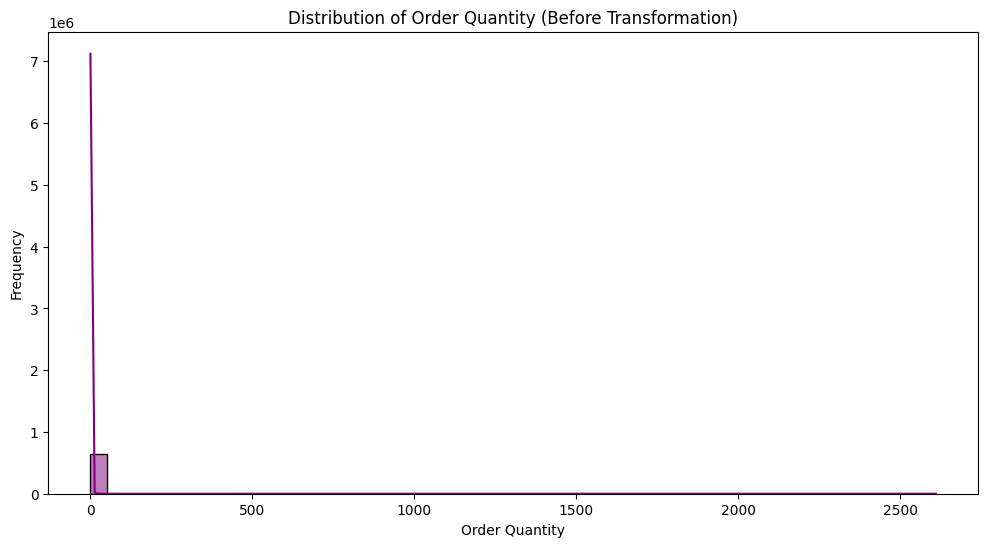

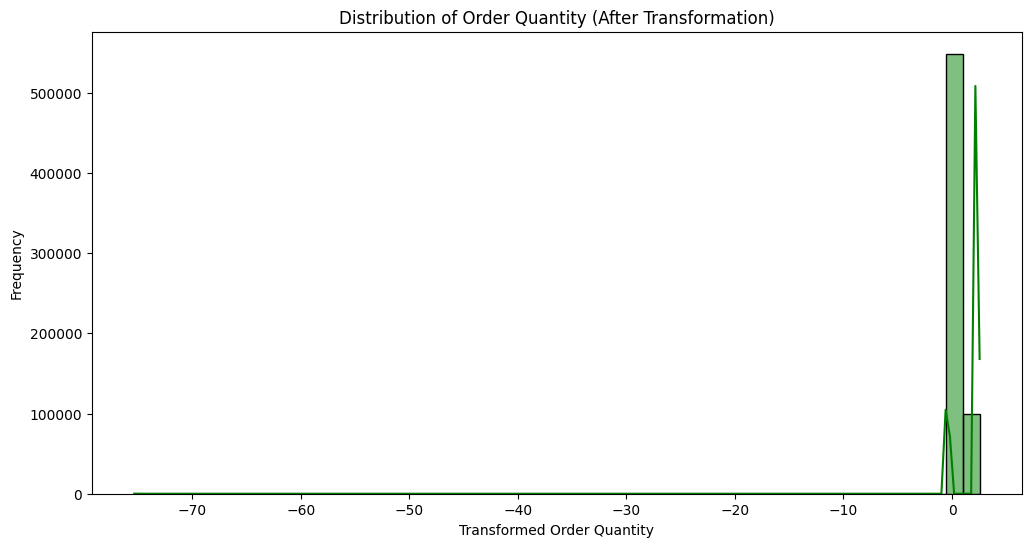

In [19]:

#Distribution of order_qty before transformation
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['order_qty'], bins=50, color='purple', kde=True)
plt.title('Distribution of Order Quantity (Before Transformation)')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

#Applying PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_cleaned['order_qty_transformed'] = scaler.fit_transform(df_cleaned[['order_qty']])

# Distribution of order_qty after transformation
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['order_qty_transformed'], bins=50, color='green', kde=True)
plt.title('Distribution of Order Quantity (After Transformation)')
plt.xlabel('Transformed Order Quantity')
plt.ylabel('Frequency')
plt.show()


##Investigate Correlations

Correlation between Gross Weight and Order Quantity:
               gross_weight  order_qty
gross_weight      1.000000  -0.000928
order_qty        -0.000928   1.000000


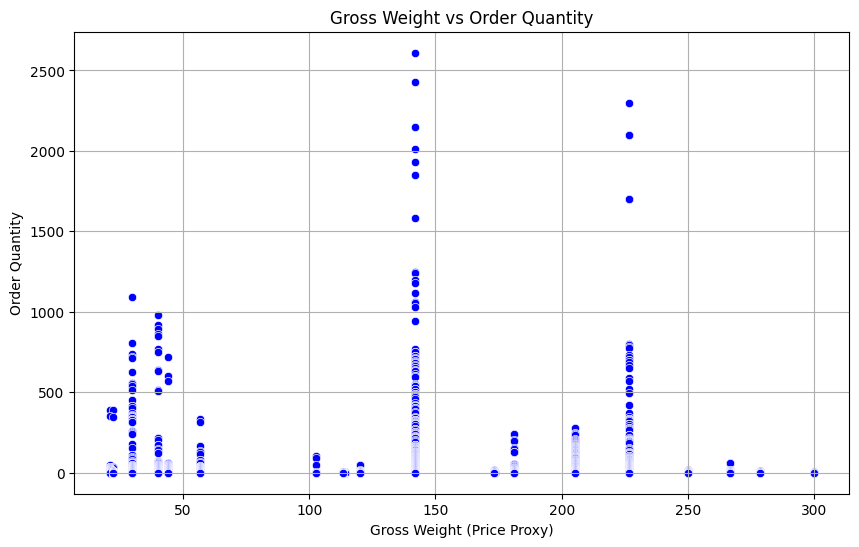

In [20]:
# Correlation between gross_weight and order_qty
correlation = df_cleaned[['gross_weight', 'order_qty']].corr()
print("Correlation between Gross Weight and Order Quantity:\n", correlation)

# Scatter plot to visualize correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gross_weight', y='order_qty', data=df_cleaned, color='blue')
plt.title('Gross Weight vs Order Quantity')
plt.xlabel('Gross Weight (Price Proxy)')
plt.ylabel('Order Quantity')
plt.grid(True)
plt.show()

##Boxplots to visualize outliers

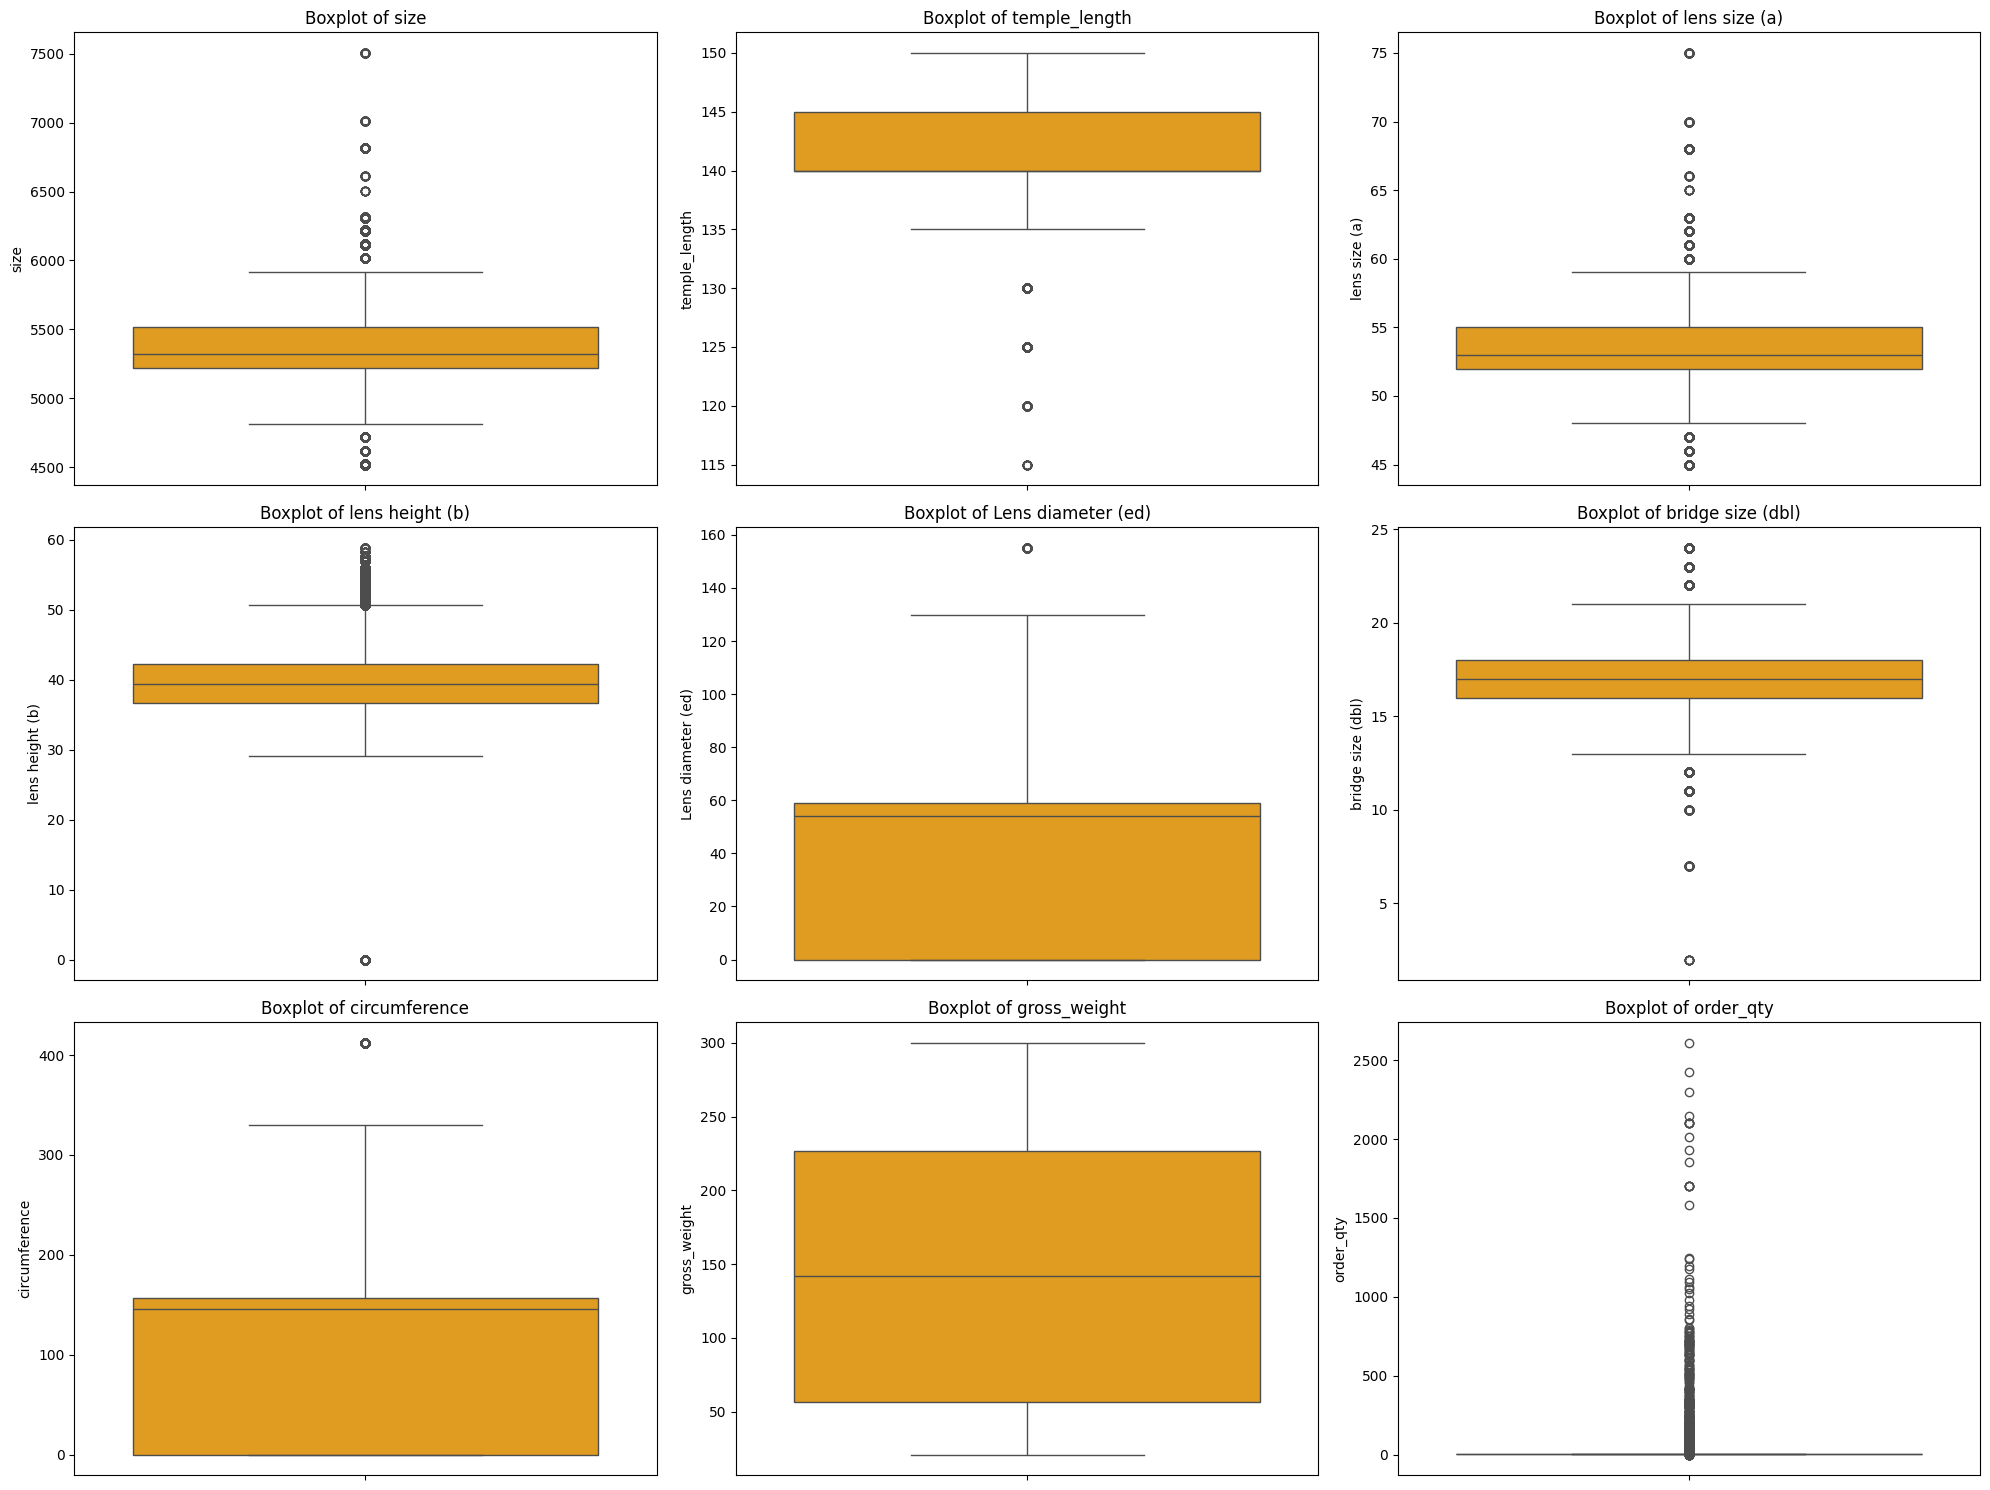

In [21]:
# Boxplots for key numerical features
numerical_cols = ['size', 'temple_length', 'lens size (a)',
                  'lens height (b)', 'Lens diameter (ed)',
                  'bridge size (dbl)', 'circumference',
                  'gross_weight', 'order_qty']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df_cleaned[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

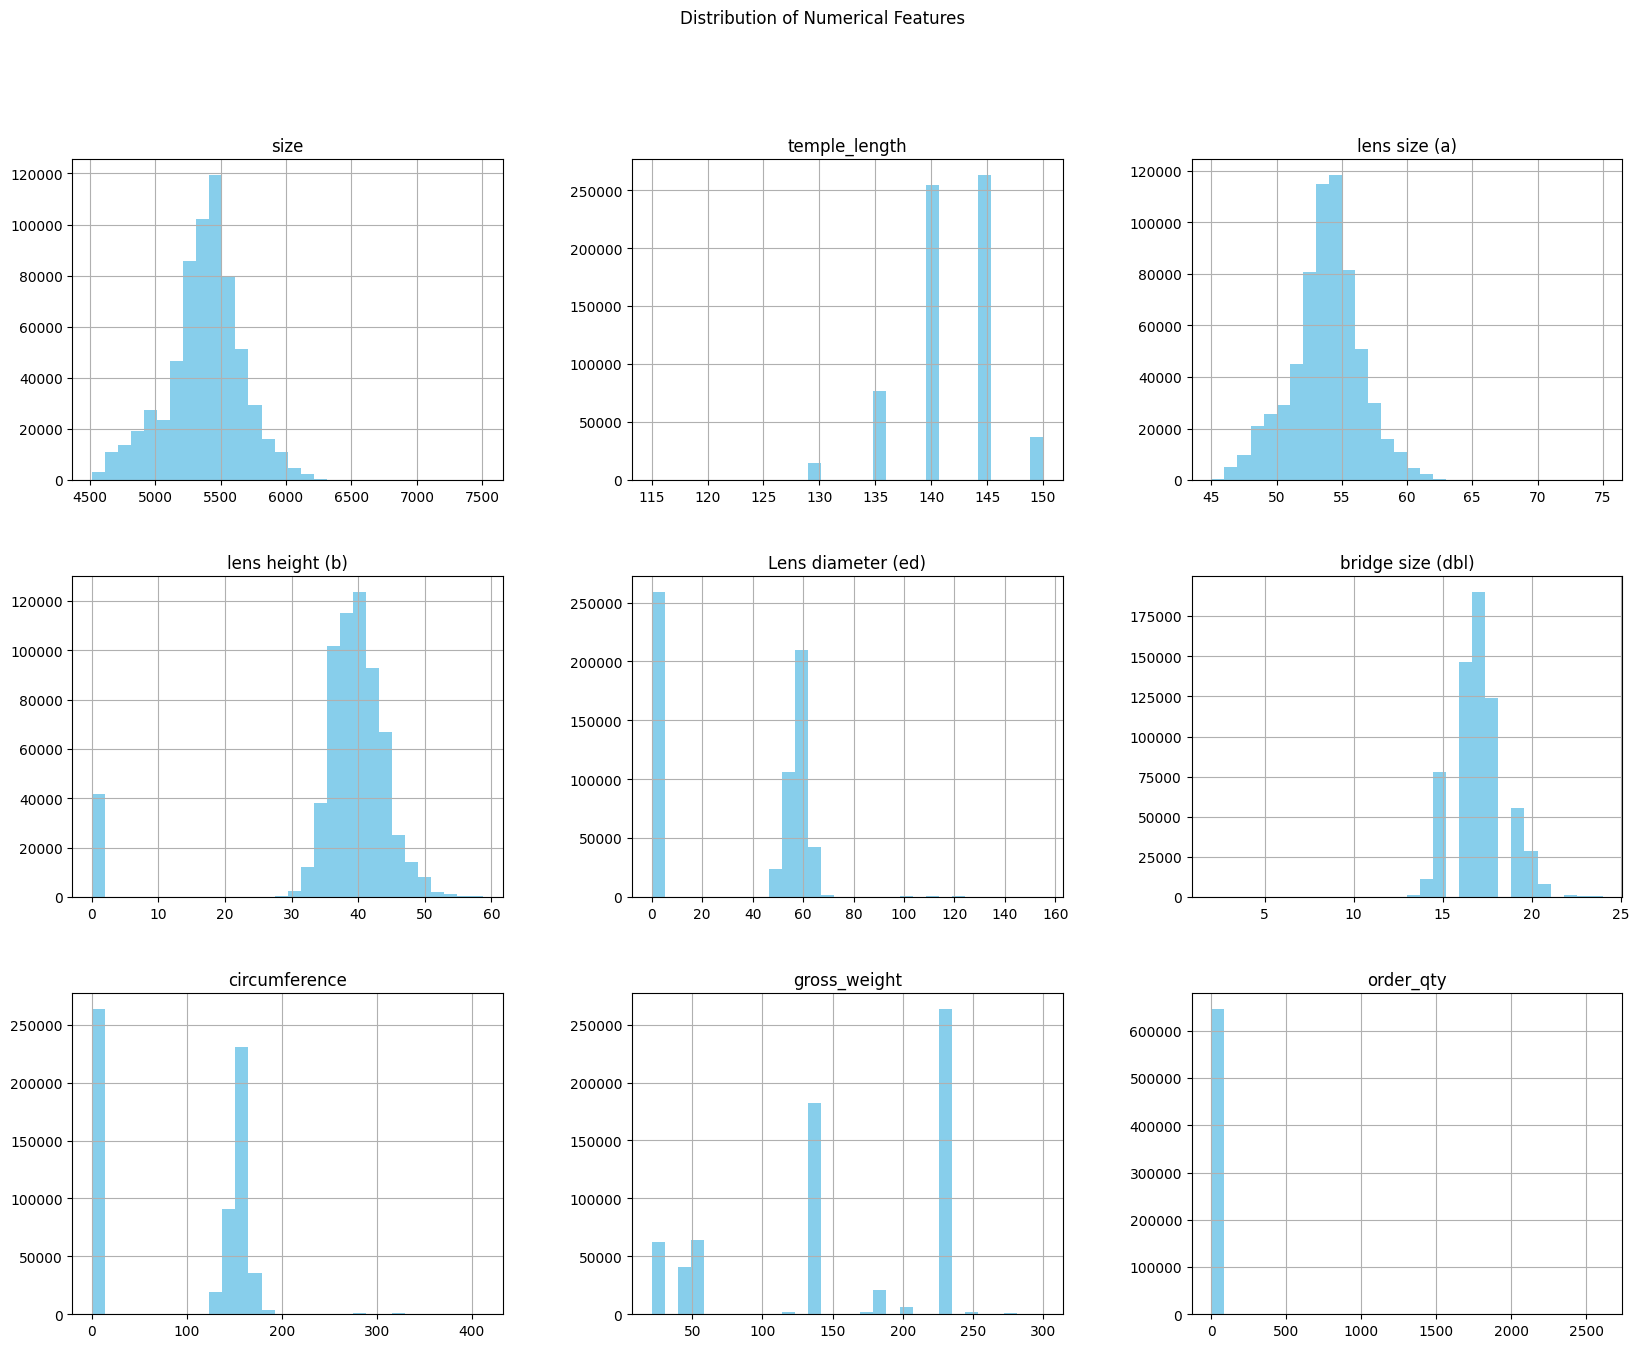

In [22]:
# Histograms for numerical variables
df_cleaned[numerical_cols].hist(bins=30, figsize=(20, 15), color='skyblue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

##Bivariate Analysis

<Figure size 2000x1500 with 0 Axes>

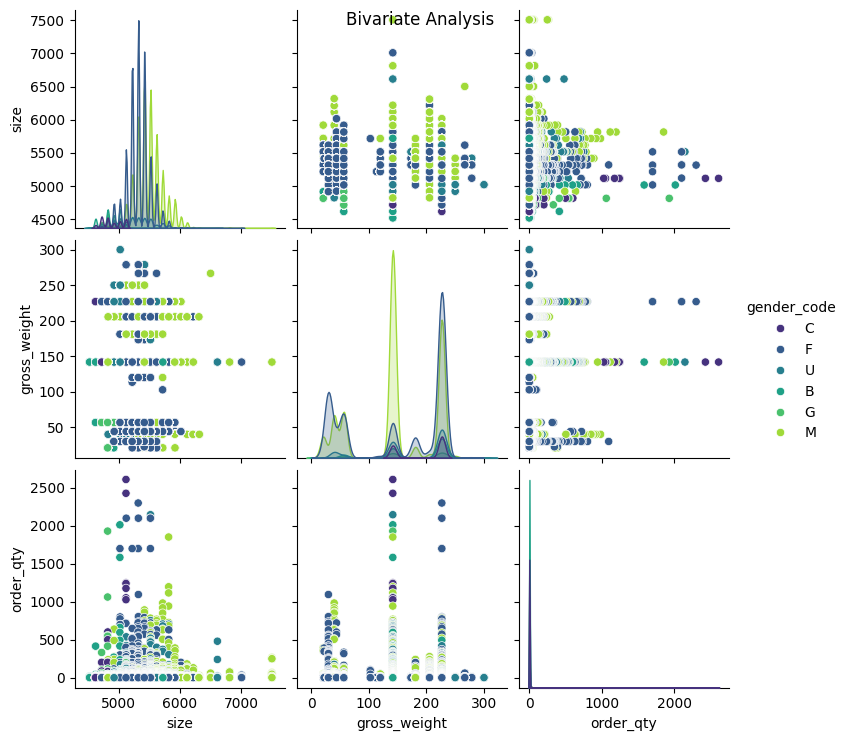

In [23]:
# Scatter plots for bivariate analysis
plt.figure(figsize=(20, 15))
sns.pairplot(df_cleaned, vars=['size', 'gross_weight', 'order_qty'], hue='gender_code', palette='viridis')
plt.suptitle('Bivariate Analysis')
plt.show()

##Multivariate Analysis
##Correlation Heatmap

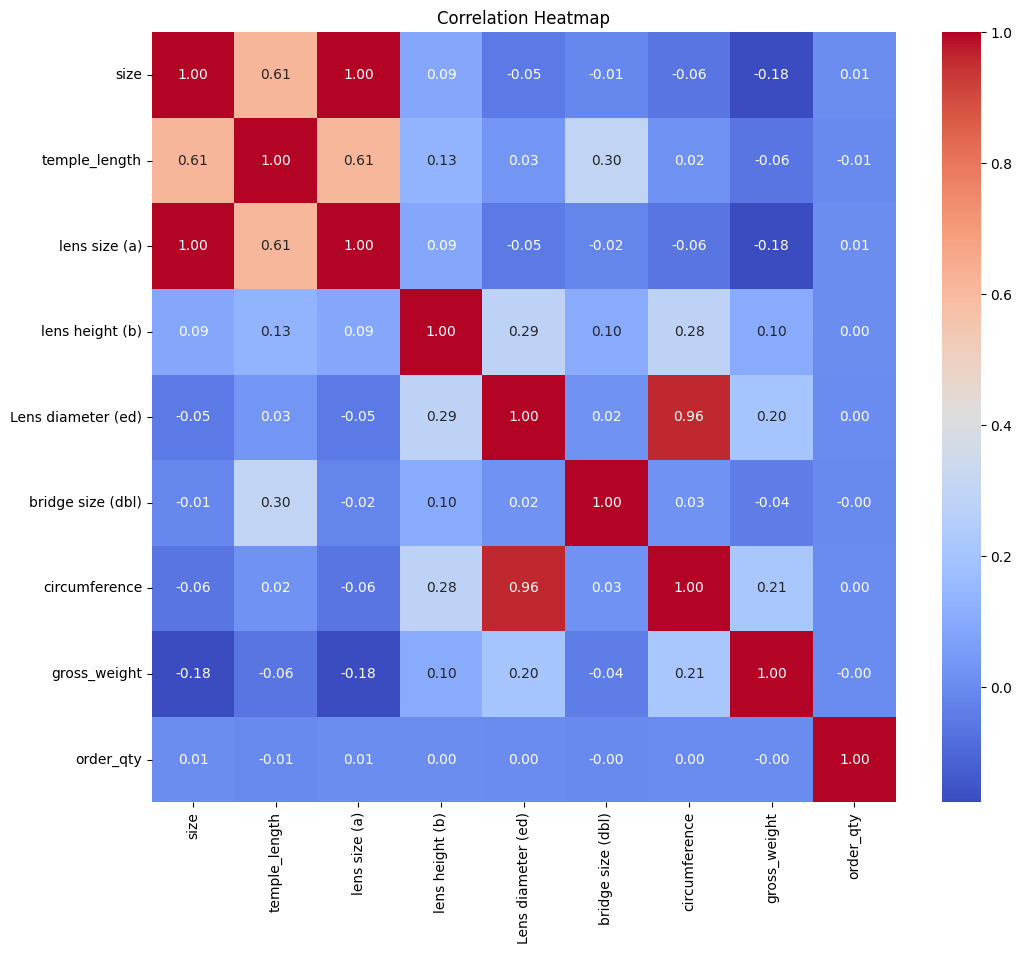

In [24]:
# Correlation heatmap for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df_cleaned[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Most Popular Frame Styles:
     style_name  order_qty
782    style555      18980
525    style323      13941
1200   style931      13523
1076    style82      12936
1196   style928      12400
834    style601      10890
770    style544      10720
771    style545       9613
2      style100       7259
884    style647       6579


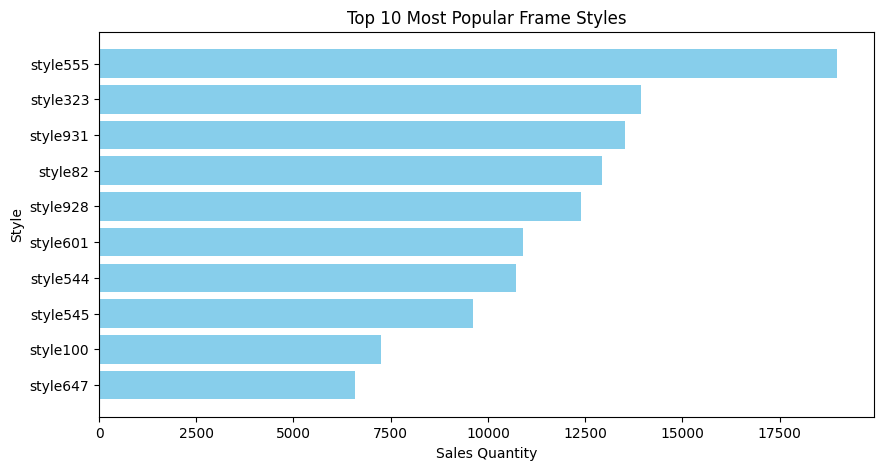

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
# Aggregate sales by frame shape
popular_frame_styles = df_cleaned.groupby("style_name")["order_qty"].sum().reset_index()
popular_frame_styles = popular_frame_styles.sort_values(by="order_qty", ascending=False)

# Display results
print("Most Popular Frame Styles:")
print(popular_frame_styles.head(10))

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(popular_frame_styles["style_name"][:10], popular_frame_styles["order_qty"][:10], color="skyblue")
plt.xlabel("Sales Quantity")
plt.ylabel("Style")
plt.title("Top 10 Most Popular Frame Styles")
plt.gca().invert_yaxis()
plt.show()


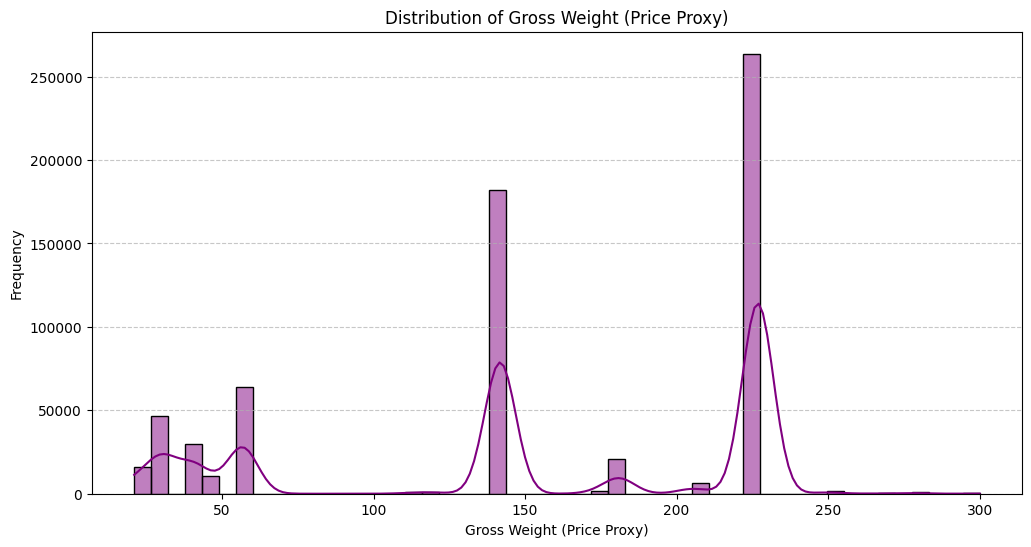

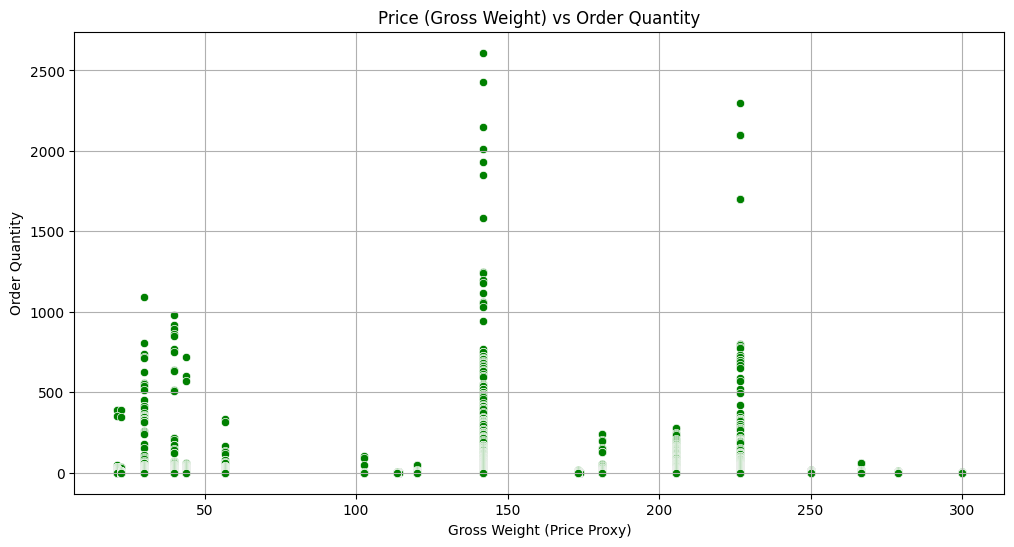

<ipython-input-26-17035c61d817>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_analysis = df_cleaned.groupby(pd.cut(df_cleaned['gross_weight'], bins=10))['order_qty'].sum()


Order Quantity by Price Range:
 gross_weight
(20.721, 48.9]    168123
(48.9, 76.8]       78510
(76.8, 104.7]        248
(104.7, 132.6]      2919
(132.6, 160.5]    314881
(160.5, 188.4]     30798
(188.4, 216.3]     25489
(216.3, 244.2]    381551
(244.2, 272.1]      3183
(272.1, 300.0]      1300
Name: order_qty, dtype: int64


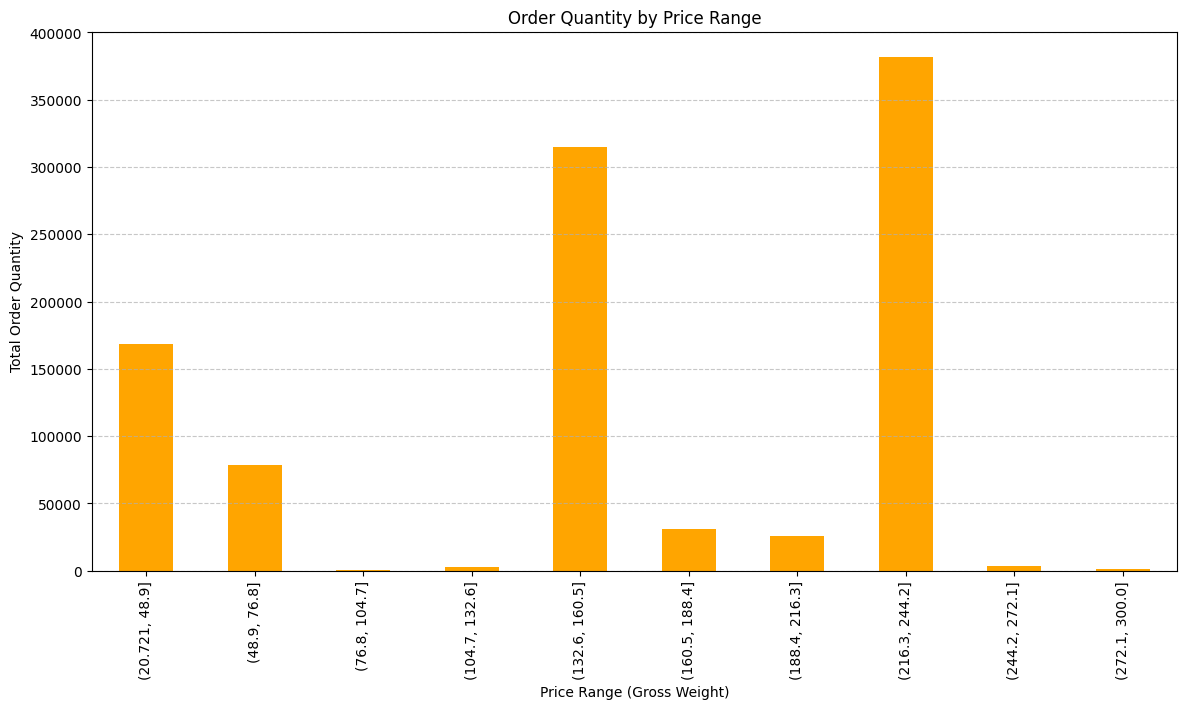

In [26]:
# Distribution of gross weight (used as price proxy)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['gross_weight'], bins=50, color='purple', kde=True)
plt.title('Distribution of Gross Weight (Price Proxy)')
plt.xlabel('Gross Weight (Price Proxy)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Analyzing relationship between price and sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='gross_weight', y='order_qty', data=df_cleaned, color='green')
plt.title('Price (Gross Weight) vs Order Quantity')
plt.xlabel('Gross Weight (Price Proxy)')
plt.ylabel('Order Quantity')
plt.grid(True)
plt.show()

# Price range analysis using groupby
price_range_analysis = df_cleaned.groupby(pd.cut(df_cleaned['gross_weight'], bins=10))['order_qty'].sum()
print("Order Quantity by Price Range:\n", price_range_analysis)

# Visualize order quantity by price range
price_range_analysis.plot(kind='bar', color='orange', figsize=(14, 7))
plt.title('Order Quantity by Price Range')
plt.xlabel('Price Range (Gross Weight)')
plt.ylabel('Total Order Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Most Popular Frame Materials:
    front_material_name  order_qty
0                     0     377304
15                   15     196615
8                     8     186961
10                   10      64731
12                   12      37500
5                     5      36878
6                     6      24751
17                   17      19258
25                   25      12040
14                   14      11578


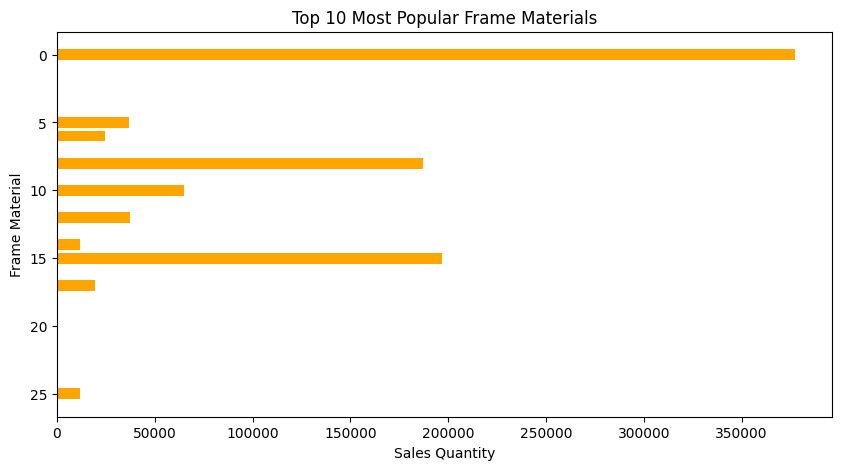

In [27]:
# Aggregate sales by frame material
material_sales = df_eda.groupby("front_material_name")["order_qty"].sum().reset_index()
material_sales = material_sales.sort_values(by="order_qty", ascending=False)

# Display results
print("Most Popular Frame Materials:")
print(material_sales.head(10))

# Visualization
plt.figure(figsize=(10, 5))
plt.barh(material_sales["front_material_name"][:10], material_sales["order_qty"][:10], color="orange")
plt.xlabel("Sales Quantity")
plt.ylabel("Frame Material")
plt.title("Top 10 Most Popular Frame Materials")
plt.gca().invert_yaxis()
plt.show()


Top 10 States by Sales:
 state  total_sales  sales_percent  sku_count  avg_sales_per_sku
     6       143335          14.23      93606           1.531259
    47       109003          10.82      36797           2.962280
    30        60392           6.00      23523           2.567360
    12        47196           4.69      15775           2.991823
    11        46166           4.58      30366           1.520319
    37        45728           4.54      35899           1.273796
    38        41300           4.10      33722           1.224720
    34        35620           3.54      20224           1.761274
    52        34567           3.43      27726           1.246736
    41        30613           3.04      24239           1.262965

Sales concentration in top 5 states: 40.3%
Sales concentration in top 10 states: 59.0%

Top 5 states that will be analyzed in detail: 6, 47, 30, 12, 11


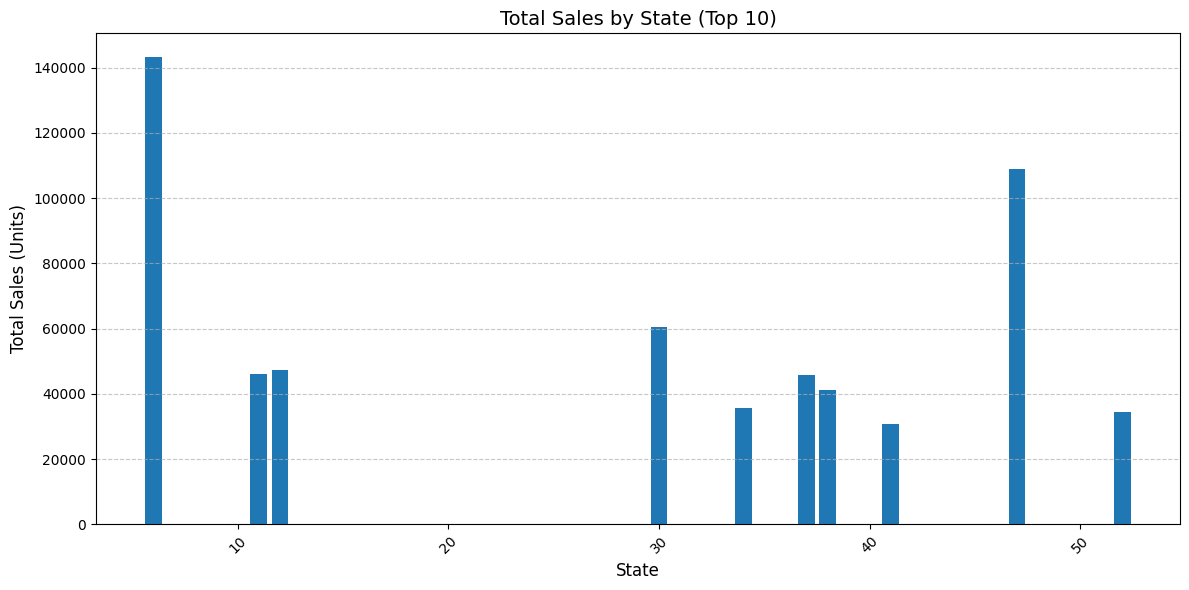

<Figure size 1200x800 with 0 Axes>

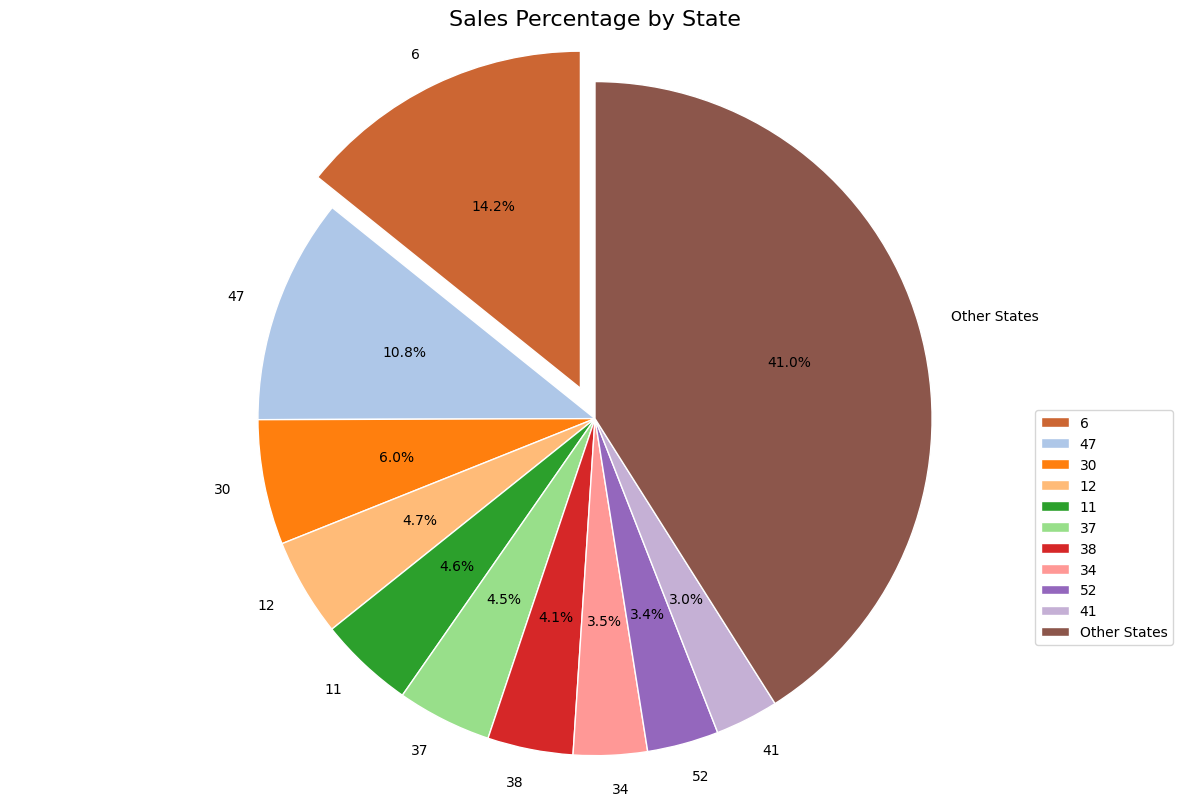

In [29]:
# State-level sales analysis
state_sales = df_eda.groupby('state')['order_qty'].agg(['sum', 'count', 'mean']).reset_index()
state_sales.columns = ['state', 'total_sales', 'sku_count', 'avg_sales_per_sku']
state_sales['sales_percent'] = (state_sales['total_sales'] / state_sales['total_sales'].sum() * 100).round(2)
state_sales = state_sales.sort_values('total_sales', ascending=False)

print("\nTop 10 States by Sales:")
print(state_sales.head(10)[['state', 'total_sales', 'sales_percent', 'sku_count', 'avg_sales_per_sku']].to_string(index=False))

# Calculate sales concentration
top_5_states_pct = state_sales.head(5)['sales_percent'].sum()
top_10_states_pct = state_sales.head(10)['sales_percent'].sum()
print(f"\nSales concentration in top 5 states: {top_5_states_pct:.1f}%")
print(f"Sales concentration in top 10 states: {top_10_states_pct:.1f}%")

# Identify top states for further analysis
top_states = state_sales.head(5)['state'].astype(str).tolist()
print(f"\nTop 5 states that will be analyzed in detail: {', '.join(top_states)}")

# Visualize state sales distribution
plt.figure(figsize=(12, 6))
plt.bar(state_sales.head(10)['state'], state_sales.head(10)['total_sales'])
plt.title('Total Sales by State (Top 10)', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales (Units)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualize state sales percentage with top 10 states
plt.figure(figsize=(12, 8))

# Get top 10 states and calculate "Other States" percentage
top_10_states = state_sales.head(10)
top_10_pct = top_10_states['sales_percent']
other_states_pct = pd.Series([100 - top_10_pct.sum()], index=['Other States'])

# Combine the data
all_pct = pd.concat([top_10_pct, other_states_pct])

# Create colors with the first slice highlighted
colors = plt.cm.tab20(np.arange(len(all_pct)))
colors[0] = [0.8, 0.4, 0.2, 1.0]  # Highlight the first state

# Create explode array (first slice slightly pulled out)
explode = [0.1] + [0] * (len(all_pct) - 1)
# Visualize state sales percentage with state names
plt.figure(figsize=(12, 8))

# Get top 10 states and calculate "Other States" percentage
top_10_states = state_sales.head(10)
top_10_pct = top_10_states['sales_percent']
state_names = top_10_states['state'].tolist()  # Explicitly get state names

other_states_pct = pd.Series([100 - top_10_pct.sum()], index=['Other States'])

# Combine the data
all_pct = pd.concat([top_10_pct, other_states_pct])
all_labels = state_names + ['Other States']

# Create colors with the first slice highlighted
colors = plt.cm.tab20(np.arange(len(all_pct)))
colors[0] = [0.8, 0.4, 0.2, 1.0]  # Highlight the first state

# Create explode array (first slice slightly pulled out)
explode = [0.1] + [0] * (len(all_pct) - 1)

# Create the pie chart
plt.pie(
    all_pct,
    labels=all_labels,  # Use explicit state names
    autopct='%1.1f%%',
    startangle=90,
    shadow=False,
    explode=explode,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Sales Percentage by State', fontsize=16)
plt.axis('equal')

# Add a legend
plt.legend(all_labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [30]:
# Analyze product preferences in top states
print("\n=== Regional Product Preferences ===")

# Create empty lists to store preference data for comparison
state_preferences = {}

for state in top_states:
    state_df = df_eda[df_eda['state'] == state]
    state_preferences[state] = {}

    # Frame shapes by state
    shape_pref = state_df.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False)
    shape_pct = (shape_pref / shape_pref.sum() * 100).round(1)
    state_preferences[state]['shapes'] = shape_pct

    # Gender preferences by state
    gender_pref = state_df.groupby('gender')['order_qty'].sum().sort_values(ascending=False)
    gender_pct = (gender_pref / gender_pref.sum() * 100).round(1)
    state_preferences[state]['genders'] = gender_pct

    # Material preferences by state
    material_pref = state_df.groupby('front_material_name')['order_qty'].sum().sort_values(ascending=False)
    material_pct = (material_pref / material_pref.sum() * 100).round(1)
    state_preferences[state]['materials'] = material_pct

    # Color preferences by state
    color_pref = state_df.groupby('color_family')['order_qty'].sum().sort_values(ascending=False)
    color_pct = (color_pref / color_pref.sum() * 100).round(1)
    state_preferences[state]['colors'] = color_pct

    # Brand preferences by state
    brand_pref = state_df.groupby('brand_name')['order_qty'].sum().sort_values(ascending=False)
    brand_pct = (brand_pref / brand_pref.sum() * 100).round(1)
    state_preferences[state]['brands'] = brand_pct

    print(f"\n{state} Preferences:")
    print(f"  Top Shapes: {', '.join([f'{s} ({p}%)' for s, p in shape_pct.head(3).items()])}")
    print(f"  Top Demographics: {', '.join([f'{g} ({p}%)' for g, p in gender_pct.head(2).items()])}")
    print(f"  Top Materials: {', '.join([f'{m} ({p}%)' for m, p in material_pct.head(2).items()])}")
    print(f"  Top Colors: {', '.join([f'{c} ({p}%)' for c, p in color_pct.head(3).items()])}")
    print(f"  Top Brands: {', '.join([f'{b} ({p}%)' for b, p in brand_pct.head(3).items()])}")


=== Regional Product Preferences ===

6 Preferences:
  Top Shapes: 
  Top Demographics: 
  Top Materials: 
  Top Colors: 
  Top Brands: 

47 Preferences:
  Top Shapes: 
  Top Demographics: 
  Top Materials: 
  Top Colors: 
  Top Brands: 

30 Preferences:
  Top Shapes: 
  Top Demographics: 
  Top Materials: 
  Top Colors: 
  Top Brands: 

12 Preferences:
  Top Shapes: 
  Top Demographics: 
  Top Materials: 
  Top Colors: 
  Top Brands: 

11 Preferences:
  Top Shapes: 
  Top Demographics: 
  Top Materials: 
  Top Colors: 
  Top Brands: 


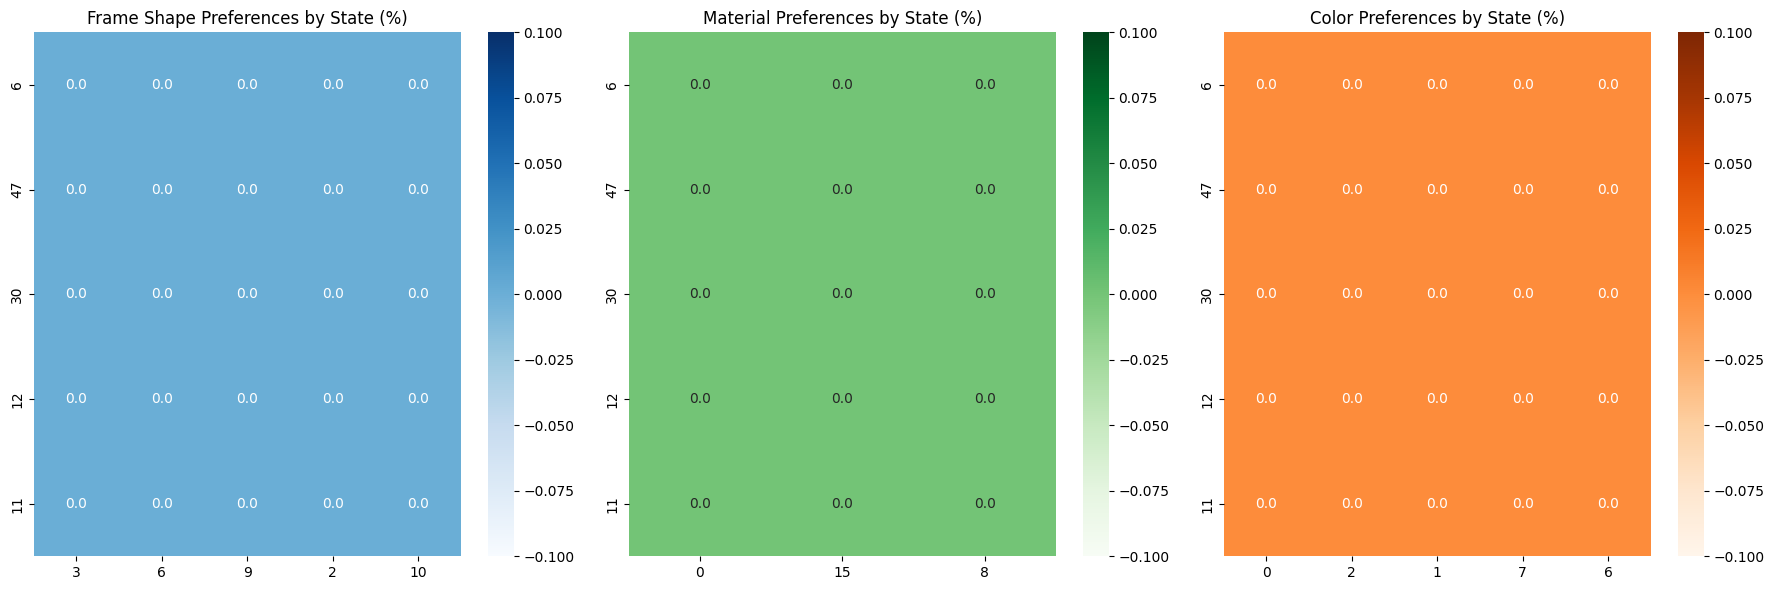

In [31]:
import seaborn as sns
# Identify top shapes, materials, and colors across all states for comparison
top_shapes = df_eda.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).head(5).index.tolist()
top_materials = df_eda.groupby('front_material_name')['order_qty'].sum().sort_values(ascending=False).head(3).index.tolist()
top_colors = df_eda.groupby('color_family')['order_qty'].sum().sort_values(ascending=False).head(5).index.tolist()

# Create comparison dataframes correctly
shape_comparison = pd.DataFrame(index=top_states, columns=top_shapes)
for state in top_states:
    for shape in top_shapes:
        shape_comparison.loc[state, shape] = state_preferences[state]['shapes'].get(shape, 0)

material_comparison = pd.DataFrame(index=top_states, columns=top_materials)
for state in top_states:
    for material in top_materials:
        material_comparison.loc[state, material] = state_preferences[state]['materials'].get(material, 0)

color_comparison = pd.DataFrame(index=top_states, columns=top_colors)
for state in top_states:
    for color in top_colors:
        color_comparison.loc[state, color] = state_preferences[state]['colors'].get(color, 0)

# Make sure data is numeric for heatmaps
shape_comparison = shape_comparison.astype(float)
material_comparison = material_comparison.astype(float)
color_comparison = color_comparison.astype(float)

# Create heatmaps to visualize regional differences
plt.figure(figsize=(18, 6))

# Frame shape heatmap
plt.subplot(1, 3, 1)
sns.heatmap(shape_comparison, annot=True, fmt='.1f', cmap='Blues')
plt.title('Frame Shape Preferences by State (%)')

# Material heatmap
plt.subplot(1, 3, 2)
sns.heatmap(material_comparison, annot=True, fmt='.1f', cmap='Greens')
plt.title('Material Preferences by State (%)')

# Color heatmap
plt.subplot(1, 3, 3)
sns.heatmap(color_comparison, annot=True, fmt='.1f', cmap='Oranges')
plt.title('Color Preferences by State (%)')

plt.tight_layout()
plt.show()

In [32]:
# Import libraries for statistical testing
from scipy.stats import chi2_contingency, f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Statistical test for regional differences
print("\n=== Statistical Analysis of Regional Differences ===")

# Chi-square test for frame shape preferences by state
shape_contingency = pd.crosstab(df_eda['state'], df_eda['frame_shape'])
chi2, p_shape, dof, expected = chi2_contingency(shape_contingency)
print(f"Frame shape preferences differ by state: Chi-square={chi2:.2f}, p-value={p_shape:.4f}")
print(f"  Statistically significant: {'Yes' if p_shape < 0.05 else 'No'}")

# Chi-square test for gender preferences by state
gender_contingency = pd.crosstab(df_eda['state'], df_eda['gender'])
chi2, p_gender, dof, expected = chi2_contingency(gender_contingency)
print(f"Gender preferences differ by state: Chi-square={chi2:.2f}, p-value={p_gender:.4f}")
print(f"  Statistically significant: {'Yes' if p_gender < 0.05 else 'No'}")

# Chi-square test for material preferences by state
material_contingency = pd.crosstab(df_eda['state'], df_eda['front_material_name'])
chi2, p_material, dof, expected = chi2_contingency(material_contingency)
print(f"Material preferences differ by state: Chi-square={chi2:.2f}, p-value={p_material:.4f}")
print(f"  Statistically significant: {'Yes' if p_material < 0.05 else 'No'}")

print("\nConclusion: ")
if all(p < 0.05 for p in [p_shape, p_gender, p_material]):
    print("All product preferences show statistically significant regional differences.")
    print("This strongly supports a location-based approach to store assortment planning.")
else:
    print("Some product preferences do not show statistically significant regional differences.")
    print("A mixed approach combining regional and global insights may be appropriate.")


=== Statistical Analysis of Regional Differences ===
Frame shape preferences differ by state: Chi-square=8945.72, p-value=0.0000
  Statistically significant: Yes
Gender preferences differ by state: Chi-square=9618.95, p-value=0.0000
  Statistically significant: Yes
Material preferences differ by state: Chi-square=27528.49, p-value=0.0000
  Statistically significant: Yes

Conclusion: 
All product preferences show statistically significant regional differences.
This strongly supports a location-based approach to store assortment planning.


### Cluster based on location

In [33]:
print("\n\nStep 4: Preparing data for clustering")

# 4.1 Aggregate data by location
print("\n4.1 Aggregating data by location")
# Group by location (state, city_district, city)
location_groups = df_eda.groupby(['state', 'city_district', 'city'])

# Calculate metrics for each location
location_data = location_groups.agg(
    total_qty=('order_qty', 'sum'),
    avg_qty=('order_qty', 'mean'),
    num_products=('style_name', 'count')
).reset_index()

print("Location data sample:")
print(location_data.head())

# 4.2 Normalize features for clustering
print("\n4.2 Normalizing features for clustering")
# Select features for clustering
cluster_features = ['total_qty', 'avg_qty', 'num_products']
X = location_data[cluster_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features:")
print(pd.DataFrame(X_scaled, columns=cluster_features).head())





Step 4: Preparing data for clustering

4.1 Aggregating data by location
Location data sample:
   state  city_district  city  total_qty    avg_qty  num_products
0      0            786    97        219  13.687500            16
1      0            786  1221         56   4.307692            13
2      1             20    79        796   1.527831           521
3      1             20   951         35   1.000000            35
4      1             20  1045         45   2.812500            16

4.2 Normalizing features for clustering
Scaled features:
   total_qty   avg_qty  num_products
0   0.027072  1.791989     -0.610466
1  -0.162824  0.413663     -0.627131
2   0.699278  0.005174      2.194757
3  -0.187289 -0.072389     -0.504923
4  -0.175639  0.193951     -0.610466




Step 5: Performing K-means clustering

5.1 Finding optimal number of clusters
Elbow curve saved as 'elbow_curve.png'

5.2 Applying K-means with 4 clusters
Cluster centers:
      total_qty     avg_qty  num_products
0   1016.213953    2.090756    568.744186
1  27322.000000   39.586087   1025.333333
2     98.360952    1.237174     84.955598
3   6269.750000  209.223039     23.000000

Number of locations in each cluster:
cluster
2    4707
0     430
3       4
1       3
Name: count, dtype: int64


Step 6: Analyzing clusters

6.1 Cluster summary
         num_locations  total_orders  avg_orders_per_location  \
cluster                                                         
2                 4707        462985                98.360952   
0                  430        436972              1016.213953   
1                    3         81966             27322.000000   
3                    4         25079              6269.750000   

         avg_products_per_location  
cluster                   

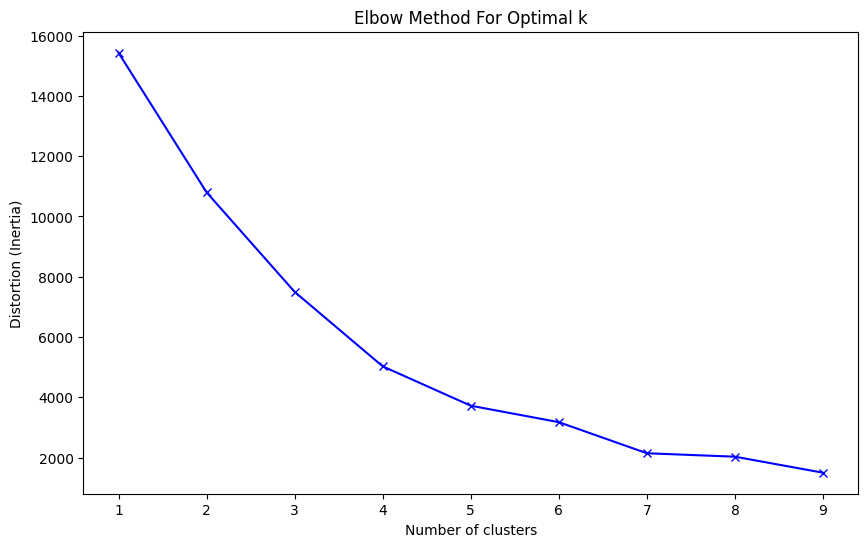

In [34]:
# Step 5: Perform K-means clustering
print("\n\nStep 5: Performing K-means clustering")

# 5.1 Find optimal number of clusters (elbow method)
print("\n5.1 Finding optimal number of clusters")
distortions = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.savefig('elbow_curve.png')
print("Elbow curve saved as 'elbow_curve.png'")

# 5.2 Apply K-means with optimal k (4 clusters based on elbow curve)
print("\n5.2 Applying K-means with 4 clusters")
kmeans = KMeans(n_clusters=4, random_state=42)
location_data['cluster'] = kmeans.fit_predict(X_scaled)

# Display cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_),
                              columns=cluster_features)
print("Cluster centers:")
print(cluster_centers)

# Count locations in each cluster
cluster_counts = location_data['cluster'].value_counts()
print("\nNumber of locations in each cluster:")
print(cluster_counts)

# Step 6: Analyze clusters
print("\n\nStep 6: Analyzing clusters")

# 6.1 Cluster summary
print("\n6.1 Cluster summary")
cluster_summary = location_data.groupby('cluster').agg(
    num_locations=('state', 'count'),
    total_orders=('total_qty', 'sum'),
    avg_orders_per_location=('total_qty', 'mean'),
    avg_products_per_location=('num_products', 'mean')
).sort_values('total_orders', ascending=False)

print(cluster_summary)

In [36]:
print("\n6.2 Detailed cluster analysis")

for cluster_id in range(4):
    print(f"\nCluster {cluster_id}:")

    # Get locations in this cluster
    cluster_locations = location_data[location_data['cluster'] == cluster_id]
    print(f"  Locations: {len(cluster_locations)}")
    print(f"  Total Orders: {cluster_locations['total_qty'].sum()}")
    print(f"  Average Orders per Location: {cluster_locations['total_qty'].mean():.2f}")

    states = cluster_locations['state'].astype(str).unique()
    print(f"  States: {', '.join(states)}")

    # Get top locations in this cluster
    top_locations = cluster_locations.sort_values('total_qty', ascending=False).head(5)
    print("  Top locations in this cluster:")
    for idx, loc in top_locations.iterrows():
        print(f"    {loc['city']}, {loc['state']}: {loc['total_qty']} orders, {loc['num_products']} products")

    # Get all product data for locations in this cluster
    cluster_location_ids = [(loc['state'], loc['city_district'], loc['city']) for idx, loc in cluster_locations.iterrows()]
    cluster_products = df_eda[df_eda.apply(lambda row: (row['state'], row['city_district'], row['city']) in cluster_location_ids, axis=1)]

    # Frame shape analysis for this cluster
    frame_shapes = cluster_products['frame_shape'].value_counts().head(3)
    print("  Top frame shapes:")
    for shape, count in frame_shapes.items():
        print(f"    {shape}: {count} products")

    # Gender analysis for this cluster
    genders = cluster_products['gender'].value_counts()
    print("  Gender distribution:")
    for gender, count in genders.items():
        print(f"    {gender}: {count} products")

    # Material analysis for this cluster
    materials = cluster_products['front_material_name'].value_counts().head(3)
    print("  Top frame materials:")
    for material, count in materials.items():
        print(f"    {material}: {count} products")

    # Brand analysis for this cluster
    brands = cluster_products['brand_name'].value_counts().head(3)
    print("  Top brands:")
    for brand, count in brands.items():
        print(f"    {brand}: {count} products")

    # Style analysis for this cluster
    style_sales = cluster_products.groupby('style_name')['order_qty'].sum().sort_values(ascending=False).head(5)
    print("  Top selling styles:")
    for style, sales in style_sales.items():
        print(f"    {style}: {sales} total orders")


6.2 Detailed cluster analysis

Cluster 0:
  Locations: 430
  Total Orders: 436972
  Average Orders per Location: 1016.21
  States: 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54
  Top locations in this cluster:
    3213.0, 34.0: 11640.0 orders, 178.0 products
    2158.0, 46.0: 11102.0 orders, 713.0 products
    22.0, 6.0: 7715.0 orders, 293.0 products
    3143.0, 6.0: 6707.0 orders, 2424.0 products
    647.0, 11.0: 6538.0 orders, 741.0 products
  Top frame shapes:
    3: 85866 products
    6: 55335 products
    9: 36148 products
  Gender distribution:
    2: 103272 products
    4: 103271 products
    5: 18352 products
    0: 9066 products
    1: 6593 products
    3: 4006 products
  Top frame materials:
    0: 94303 products
    15: 50535 products
    8: 37737 products
  Top brands:
    6: 36199 products
    11: 30545 products
    2: 24697 products
  



Step 7: Generating recommendations

Optimal Frame Assortment Recommendations By Cluster:

Cluster 0 Recommendations:
  Primary demographic: 2
  Recommended frame shape: 3
  Recommended material: 0
  Must-stock styles: style931, style928, style323
  Target states: 1, 2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 52, 53, 54

Cluster 1 Recommendations:
  Primary demographic: 2
  Recommended frame shape: 3
  Recommended material: 0
  Must-stock styles: style555, style544, style301
  Target states: 12, 30, 47

Cluster 2 Recommendations:
  Primary demographic: 4
  Recommended frame shape: 3
  Recommended material: 0
  Must-stock styles: style82, style555, style931
  Target states: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 

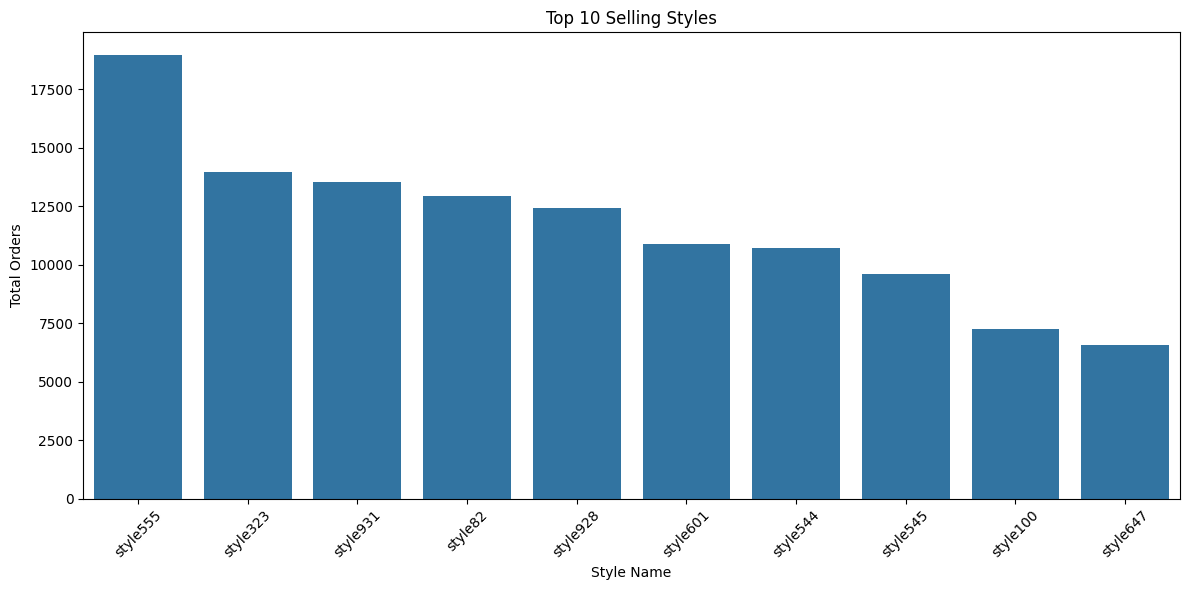

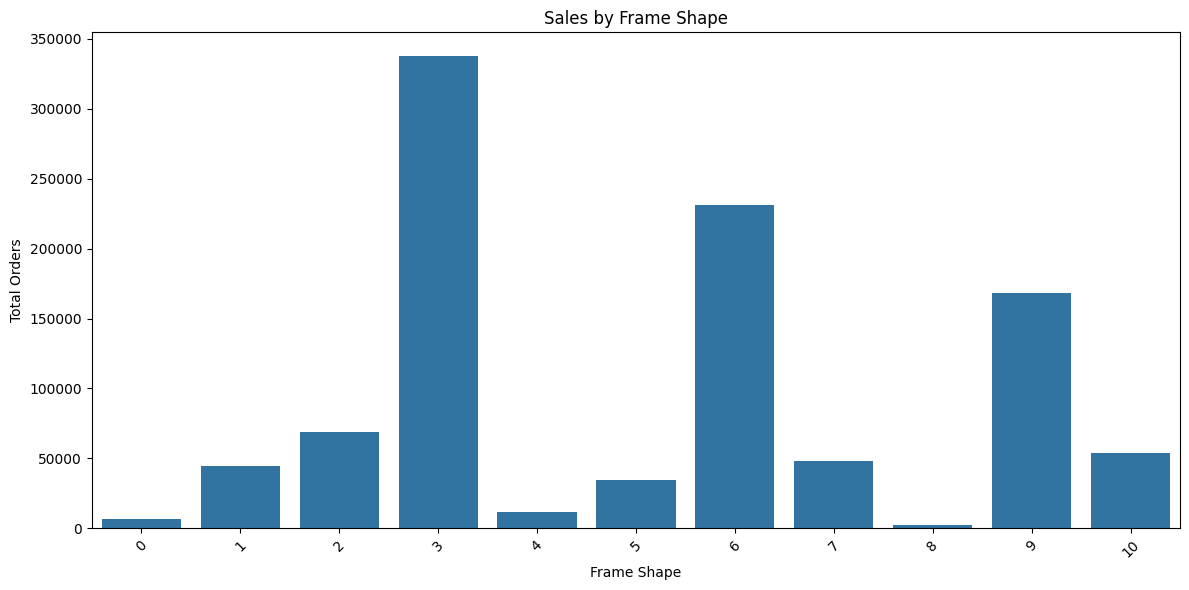

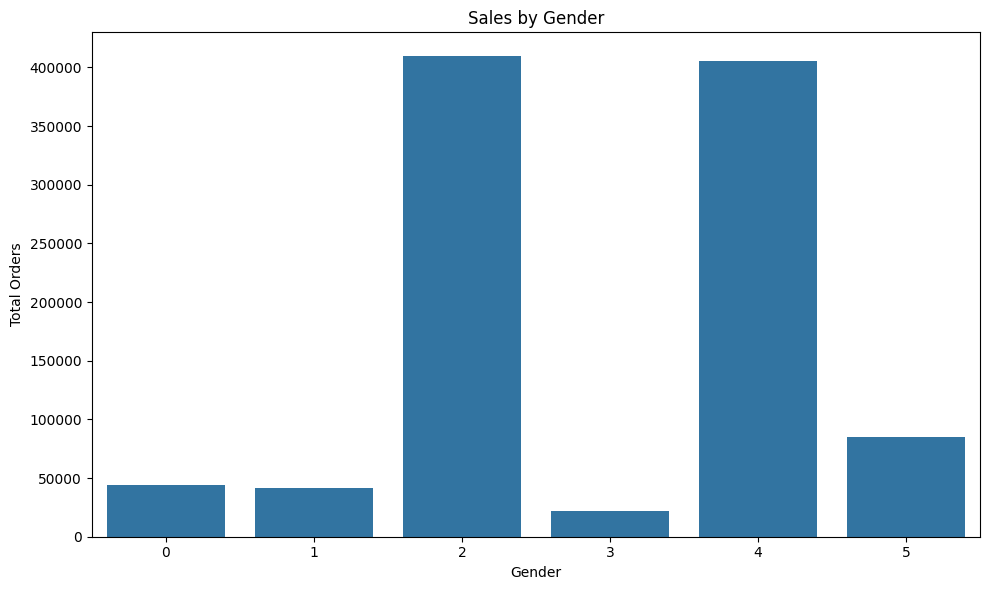

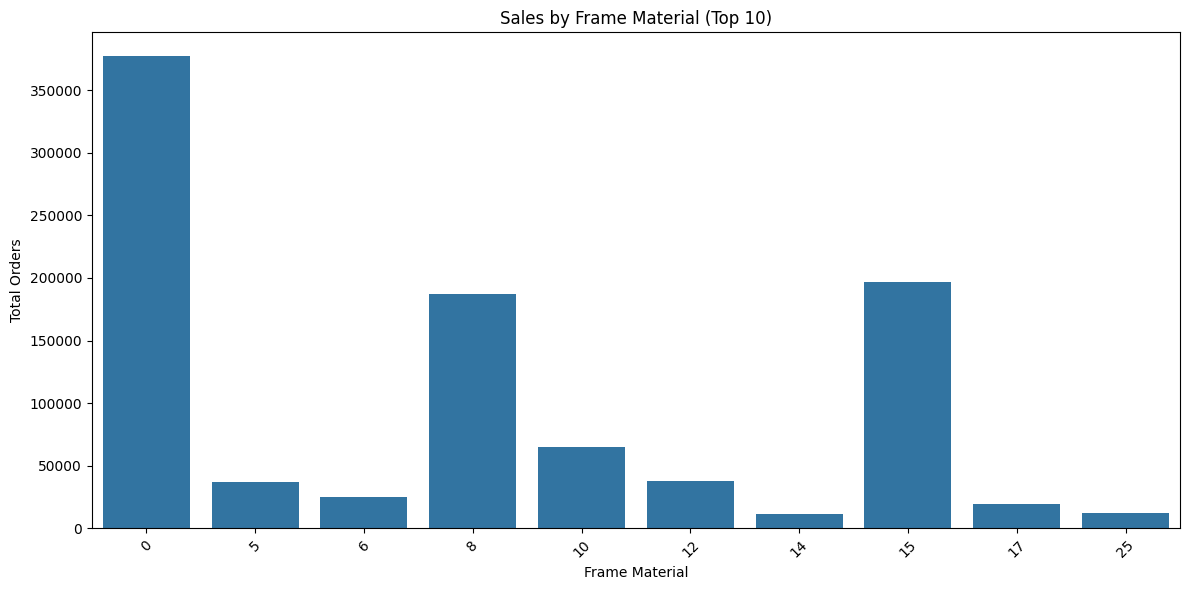

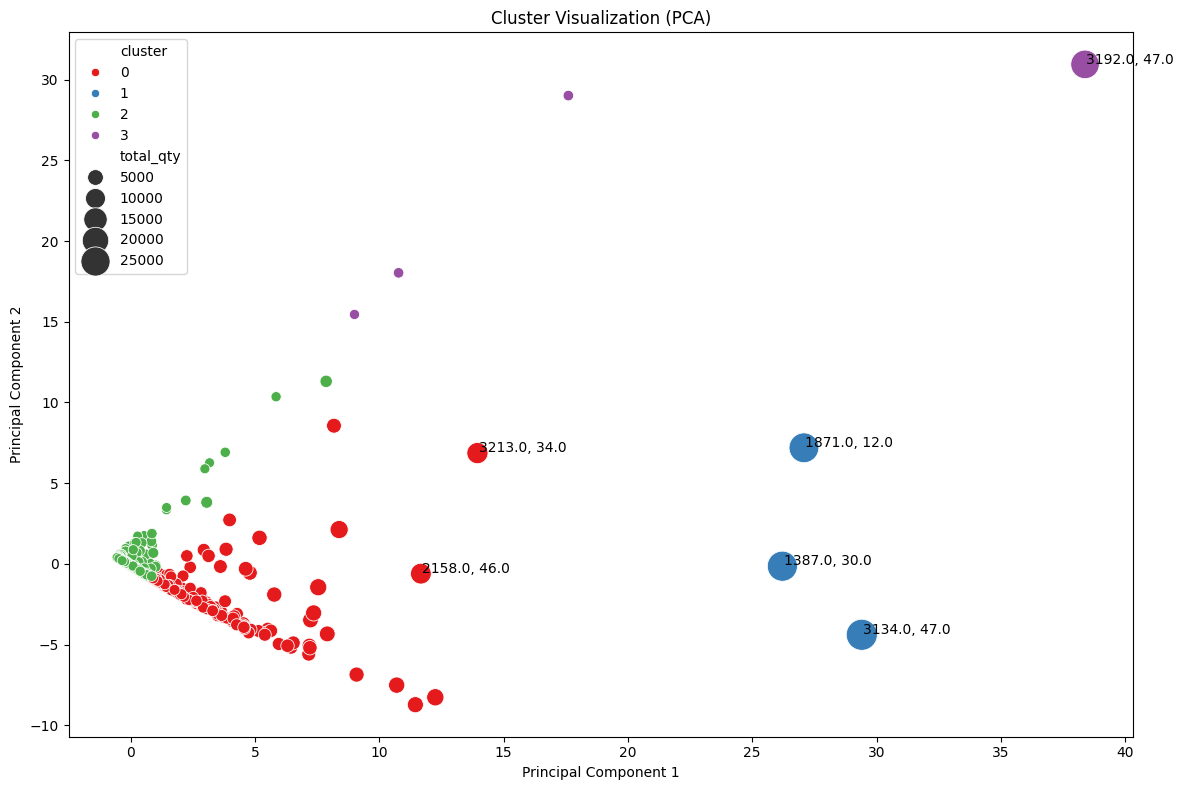

In [38]:
!pip install scikit-learn
from sklearn.decomposition import PCA
print("\n\nStep 7: Generating recommendations")

print("\nOptimal Frame Assortment Recommendations By Cluster:")

for cluster_id in range(4):
    print(f"\nCluster {cluster_id} Recommendations:")

    # Get locations in this cluster
    cluster_locations = location_data[location_data['cluster'] == cluster_id]

    # Get all product data for locations in this cluster
    cluster_location_ids = [(loc['state'], loc['city_district'], loc['city']) for idx, loc in cluster_locations.iterrows()]
    cluster_products = df_eda[df_eda.apply(lambda row: (row['state'], row['city_district'], row['city']) in cluster_location_ids, axis=1)]

    # Identify key attributes for this cluster
    gender_pref = cluster_products['gender'].value_counts().index[0]
    shape_pref = cluster_products['frame_shape'].value_counts().index[0]
    material_pref = cluster_products['front_material_name'].value_counts().index[0]

    # Get top 3 selling styles
    top_styles = cluster_products.groupby('style_name')['order_qty'].sum().sort_values(ascending=False).head(3).index.tolist()

    print(f"  Primary demographic: {gender_pref}")
    print(f"  Recommended frame shape: {shape_pref}")
    print(f"  Recommended material: {material_pref}")
    print(f"  Must-stock styles: {', '.join(top_styles)}")

    # Get states in this cluster
    states = cluster_locations['state'].astype(str).unique()
    print(f"  Target states: {', '.join(states)}")


# Step 8: Visualize key findings
print("\n\nStep 8: Visualizing key findings")

# 8.1 Top selling styles
print("\n8.1 Visualizing top selling styles")
top_styles_df = df_eda.groupby('style_name')['order_qty'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='style_name', y='order_qty', data=top_styles_df)
plt.title('Top 10 Selling Styles')
plt.xlabel('Style Name')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('top_styles.png')
print("Top styles chart saved as 'top_styles.png'")

# 8.2 Sales by frame shape
print("\n8.2 Visualizing sales by frame shape")
shape_sales = df_eda.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='frame_shape', y='order_qty', data=shape_sales)
plt.title('Sales by Frame Shape')
plt.xlabel('Frame Shape')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('frame_shape_sales.png')
print("Frame shape sales chart saved as 'frame_shape_sales.png'")

# 8.3 Sales by gender
print("\n8.3 Visualizing sales by gender")
gender_sales = df_eda.groupby('gender')['order_qty'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='order_qty', data=gender_sales)
plt.title('Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.tight_layout()
plt.savefig('gender_sales.png')
print("Gender sales chart saved as 'gender_sales.png'")

# 8.4 Sales by material
print("\n8.4 Visualizing sales by material")
material_sales = df_eda.groupby('front_material_name')['order_qty'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='front_material_name', y='order_qty', data=material_sales)
plt.title('Sales by Frame Material (Top 10)')
plt.xlabel('Frame Material')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('material_sales.png')
print("Material sales chart saved as 'material_sales.png'")

# 8.5 Cluster visualization using PCA
print("\n8.5 Visualizing clusters")
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = location_data['cluster']
pca_df['state'] = location_data['state']
pca_df['city'] = location_data['city']
pca_df['total_qty'] = location_data['total_qty']

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', size='total_qty',
                sizes=(50, 500), palette='Set1', data=pca_df)
plt.title('Cluster Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for idx, row in pca_df.iterrows():
    if row['total_qty'] > 10000:  # Label only large locations
        plt.text(row['PC1']+0.05, row['PC2']+0.05, f"{row['city']}, {row['state']}")
plt.tight_layout()
plt.savefig('clusters_pca.png')
print("Cluster visualization saved as 'clusters_pca.png'")

print("\n\nAnalysis complete!")

* Cluster 0 includes almost all states (47 states plus territories), suggesting this is a broad, nationwide market segment with common preferences.
* Cluster 1 is very focused on just three southern states: Georgia, North Carolina, and Texas. This could represent a specific southern regional market with distinct preferences.
* Cluster 2 is another nationwide cluster that includes all states and territories (even more comprehensive than Cluster 0), but with a different demographic focus (male customers vs. female in Cluster 0).
* Cluster 3 includes just four states (Georgia, Missouri, New York, and Texas) which span different traditional regions (South, Midwest, Northeast, and South/Southwest). This suggests the clustering is based on similarities in buying patterns rather than geographic proximity.

#### Based on brand

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('carnegie_mellon_output_summary_final.csv')

# Part 1: Brand Performance Analysis
print("="*80)
print("BRAND PERFORMANCE ANALYSIS")
print("="*80)

# Overall brand performance
brand_performance = df.groupby('brand_name').agg(
    total_sales=('order_qty', 'sum'),
    num_products=('style_name', 'nunique'),
    avg_sales_per_product=('order_qty', lambda x: x.sum() / len(x.unique())),
    num_locations=('city', 'nunique')
).sort_values('total_sales', ascending=False)

print("\nOverall Brand Performance:")
print(brand_performance)

# Calculate market share
total_sales = df['order_qty'].sum()
brand_performance['market_share'] = (brand_performance['total_sales'] / total_sales * 100).round(2)
print("\nBrand Market Share (%):")
print(brand_performance[['market_share']].sort_values('market_share', ascending=False))

# Part 2: Brand-Specific Product Attributes
print("\n\n" + "="*80)
print("BRAND-SPECIFIC PRODUCT ATTRIBUTES")
print("="*80)

# For each brand, analyze preferred attributes
for brand in brand_performance.index[:5]:  # Top 5 brands
    print(f"\nAnalysis for {brand}:")
    brand_data = df[df['brand_name'] == brand]

    # Frame shapes for this brand
    print("  Top frame shapes:")
    shape_counts = brand_data.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).head(3)
    for shape, count in shape_counts.items():
        print(f"    {shape}: {count} units ({count/brand_data['order_qty'].sum()*100:.1f}%)")

    # Materials for this brand
    print("  Top materials:")
    material_counts = brand_data.groupby('front_material_name')['order_qty'].sum().sort_values(ascending=False).head(3)
    for material, count in material_counts.items():
        print(f"    {material}: {count} units ({count/brand_data['order_qty'].sum()*100:.1f}%)")

    # Colors for this brand
    print("  Top colors:")
    color_counts = brand_data.groupby('color_family')['order_qty'].sum().sort_values(ascending=False).head(3)
    for color, count in color_counts.items():
        print(f"    {color}: {count} units ({count/brand_data['order_qty'].sum()*100:.1f}%)")

# Part 3: Demographic Alignment
print("\n\n" + "="*80)
print("DEMOGRAPHIC ALIGNMENT")
print("="*80)

# Analyze each brand by gender
gender_alignment = df.pivot_table(
    index='brand_name',
    columns='gender',
    values='order_qty',
    aggfunc='sum',
    fill_value=0
)

# Calculate percentage by gender for each brand
for gender in gender_alignment.columns:
    gender_alignment[f'{gender}_pct'] = gender_alignment[gender] / gender_alignment.sum(axis=1) * 100

print("\nBrand Alignment with Gender Demographics:")
print(gender_alignment.sort_values('FEMALE', ascending=False))

# Find potential demographic misalignments
print("\nPotential demographic misalignments:")
for brand in gender_alignment.index:
    if gender_alignment.loc[brand, 'FEMALE'] > 0 and gender_alignment.loc[brand, 'MALE'] > 0:
        female_pct = gender_alignment.loc[brand, 'FEMALE_pct']
        male_pct = gender_alignment.loc[brand, 'MALE_pct']
        if abs(female_pct - male_pct) < 20:  # Balanced brand
            print(f"  {brand}: Balanced between male ({male_pct:.1f}%) and female ({female_pct:.1f}%)")
        elif female_pct > 70:
            print(f"  {brand}: Strongly female-oriented ({female_pct:.1f}%), potential to expand male offerings")
        elif male_pct > 70:
            print(f"  {brand}: Strongly male-oriented ({male_pct:.1f}%), potential to expand female offerings")

# Part 4: Regional Performance
print("\n\n" + "="*80)
print("REGIONAL PERFORMANCE")
print("="*80)

# Create a state-brand matrix of sales
state_brand_sales = df.pivot_table(
    index='state',
    columns='brand_name',
    values='order_qty',
    aggfunc='sum',
    fill_value=0
)

# Calculate the percent of total sales for each brand in each state
state_totals = state_brand_sales.sum(axis=1)
for brand in state_brand_sales.columns:
    state_brand_sales[f'{brand}_pct'] = state_brand_sales[brand] / state_totals * 100

print("\nStates where brands have highest market share:")
for brand in brand_performance.index[:5]:  # Top 5 brands
    if f'{brand}_pct' in state_brand_sales.columns:
        top_states = state_brand_sales[f'{brand}_pct'].sort_values(ascending=False).head(3)
        print(f"\n{brand}:")
        for state, pct in top_states.items():
            if pct > 0:
                print(f"  {state}: {pct:.1f}% market share")

# Identify untapped markets
print("\nPotential untapped markets:")
for brand in brand_performance.index[:5]:  # Top 5 brands
    if brand in state_brand_sales.columns:
        # States where this brand has zero or very low sales but other brands do well
        potential_states = state_brand_sales[
            (state_brand_sales[brand] == 0) &
            (state_brand_sales.sum(axis=1) > 1000)  # States with significant overall sales
        ].index

        if len(potential_states) > 0:
            print(f"\n{brand} has no sales in these active markets:")
            for state in potential_states:
                total_state_sales = state_brand_sales.loc[state].sum()
                print(f"  {state}: {total_state_sales:.0f} total units sold by other brands")

# Part 5: Competitive Positioning
print("\n\n" + "="*80)
print("COMPETITIVE POSITIONING")
print("="*80)

# Analyze each brand's position in the market
brand_division = df.groupby(['brand_name', 'division_name']).agg(
    total_sales=('order_qty', 'sum'),
    num_products=('style_name', 'nunique')
).reset_index()

print("\nBrand positioning by division:")
for division in df['division_name'].unique():
    print(f"\n{division} division:")
    div_brands = brand_division[brand_division['division_name'] == division].sort_values('total_sales', ascending=False)
    for _, row in div_brands.iterrows():
        print(f"  {row['brand_name']}: {row['total_sales']} units, {row['num_products']} products")

# Find frame shape gaps in the market
print("\nFrame shape gaps in the market:")
shape_gender_matrix = df.pivot_table(
    index='frame_shape',
    columns='gender',
    values='order_qty',
    aggfunc='sum',
    fill_value=0
)

# Normalize to see relative distribution
shape_gender_norm = shape_gender_matrix.div(shape_gender_matrix.sum(axis=0), axis=1) * 100

# Find shapes with gender imbalances
for shape in shape_gender_norm.index:
    if 'MALE' in shape_gender_norm.columns and 'FEMALE' in shape_gender_norm.columns:
        male_pct = shape_gender_norm.loc[shape, 'MALE']
        female_pct = shape_gender_norm.loc[shape, 'FEMALE']

        if male_pct > 2*female_pct:
            print(f"  {shape}: Strong male preference, opportunity for female-focused designs")
        elif female_pct > 2*male_pct:
            print(f"  {shape}: Strong female preference, opportunity for male-focused designs")

# Part 6: Brand Manager Recommendations
print("\n\n" + "="*80)
print("BRAND MANAGER RECOMMENDATIONS")
print("="*80)

# Generate specific recommendations for each brand
for brand in brand_performance.index[:10]:  # Top 10 brands
    print(f"\nRecommendations for {brand}:")

    brand_data = df[df['brand_name'] == brand]

    # Check if brand exists in the data
    if len(brand_data) == 0:
        print("  No data available for this brand")
        continue

    # 1. Product mix recommendations
    top_shape = brand_data.groupby('frame_shape')['order_qty'].sum().idxmax()
    top_material = brand_data.groupby('front_material_name')['order_qty'].sum().idxmax()
    top_color = brand_data.groupby('color_family')['order_qty'].sum().idxmax()

    # Find shapes selling well overall but not for this brand
    all_top_shapes = df.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).head(5).index
    brand_shapes = brand_data.groupby('frame_shape')['order_qty'].sum().index
    missing_shapes = [shape for shape in all_top_shapes if shape not in brand_shapes]

    print("  1. Product Mix:")
    print(f"     - Continue focus on {top_shape} frames with {top_material} in {top_color}")
    if missing_shapes:
        print(f"     - Consider expanding into {', '.join(missing_shapes)} which sell well overall")

    # 2. Demographic recommendations
    if 'gender' in brand_data.columns:
        primary_gender = brand_data.groupby('gender')['order_qty'].sum().idxmax()
        gender_pct = brand_data[brand_data['gender'] == primary_gender]['order_qty'].sum() / brand_data['order_qty'].sum() * 100

        print("  2. Demographic Strategy:")
        if gender_pct > 80:
            print(f"     - Current focus heavily on {primary_gender} ({gender_pct:.1f}%)")
            other_genders = [g for g in df['gender'].unique() if g != primary_gender]
            if other_genders:
                print(f"     - Consider expanding offerings for {', '.join(other_genders)} to broaden appeal")
        else:
            print(f"     - Maintain balanced appeal across demographic groups")

    # 3. Regional recommendations
    brand_by_state = brand_data.groupby('state')['order_qty'].sum()
    top_states = brand_by_state.sort_values(ascending=False).head(3).index

    # Find states with good overall sales but low brand sales
    all_states_sales = df.groupby('state')['order_qty'].sum().sort_values(ascending=False)
    potential_states = [
        state for state in all_states_sales.head(10).index
        if state not in top_states and (state not in brand_by_state.index or brand_by_state[state] < 100)
    ]

    print("  3. Regional Strategy:")
    print(f"     - Strengthen presence in core markets: {', '.join(top_states)}")
    if potential_states:
        print(f"     - Target expansion in high-potential states: {', '.join(potential_states[:3])}")

    # 4. Competitive positioning
    division = brand_data['division_name'].iloc[0] if not brand_data['division_name'].empty else "Unknown"
    competitors = df[(df['division_name'] == division) & (df['brand_name'] != brand)]['brand_name'].unique()

    print("  4. Competitive Positioning:")
    print(f"     - Current position: {division} division")
    if len(competitors) > 0:
        print(f"     - Key competitors: {', '.join(competitors[:3])}")

        # Find competitor strengths to target
        comp_data = df[df['brand_name'].isin(competitors)]
        comp_shapes = comp_data.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).head(3)
        brand_shapes = brand_data.groupby('frame_shape')['order_qty'].sum().sort_values(ascending=False).head(3)

        comp_advantage = [shape for shape in comp_shapes.index if shape not in brand_shapes.index]
        if comp_advantage:
            print(f"     - Address competitor advantage in {', '.join(comp_advantage)} frames")

    # 5. Cross-selling opportunities
    print("  5. Cross-selling Opportunities:")

    # Find styles that sell well in the same locations
    brand_locations = brand_data[['state', 'city']].drop_duplicates()
    location_match = pd.merge(df, brand_locations, on=['state', 'city'])
    other_styles = location_match[location_match['brand_name'] != brand].groupby('style_name')['order_qty'].sum().sort_values(ascending=False).head(3)

    if not other_styles.empty:
        print(f"     - Bundle with complementary styles that sell well in same locations: {', '.join(other_styles.index)}")

BRAND PERFORMANCE ANALYSIS

Overall Brand Performance:
            total_sales  num_products  avg_sales_per_product  num_locations
brand_name                                                                 
brand15          185657           143            1197.787097           3256
brand2           116452           121            1386.333333           2295
brand10          100736           124             891.469027           1976
brand11           96601           115            1050.010870           2117
brand12           78510            74            1670.425532           2454
brand8            72404            87            1508.416667           3017
brand16           69049            59            1866.189189           2163
brand6            54808            61             869.968254           1709
brand7            54601           138             487.508929           1091
brand5            51099            55            1216.642857           1387
brand14           42621          

##Optimal product configurations using Random forest regression


First 5 rows:
  style_name state city_district           city  size  color  temple_length  \
0   style555    NC      GUILFORD     GREENSBORO  5116      1            135   
1   style555    NC      GUILFORD     GREENSBORO  5116      4            135   
2   style100    GA      GWINNETT  LAWRENCEVILLE  5316    259            140   
3   style928    GA      GWINNETT  LAWRENCEVILLE  5517    220            145   
4   style301    GA      GWINNETT  LAWRENCEVILLE  5516    237            135   

             color_description color_family hex_color  ...  \
0  ONYX MATTE W/STAR PHOSPHO T        BLACK   #000000  ...   
1   BLACK MATTE W/STAR PHOSPHO        BLACK   #000000  ...   
2               HONEY TORTOISE        BROWN   #BAA38A  ...   
3               TORTOISE/GREEN        BROWN   #704628  ...   
4            DARK TORTOISE/RED        BROWN   #B68963  ...   

   frame_construction  frame_shape_code         frame_shape  gender_code  \
0            FULL RIM                 M  MODIFIED RECTANGLE  

<ipython-input-40-e3bf2d334e82>:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_candidates['predicted_order_qty'], y=config_labels, palette="viridis")


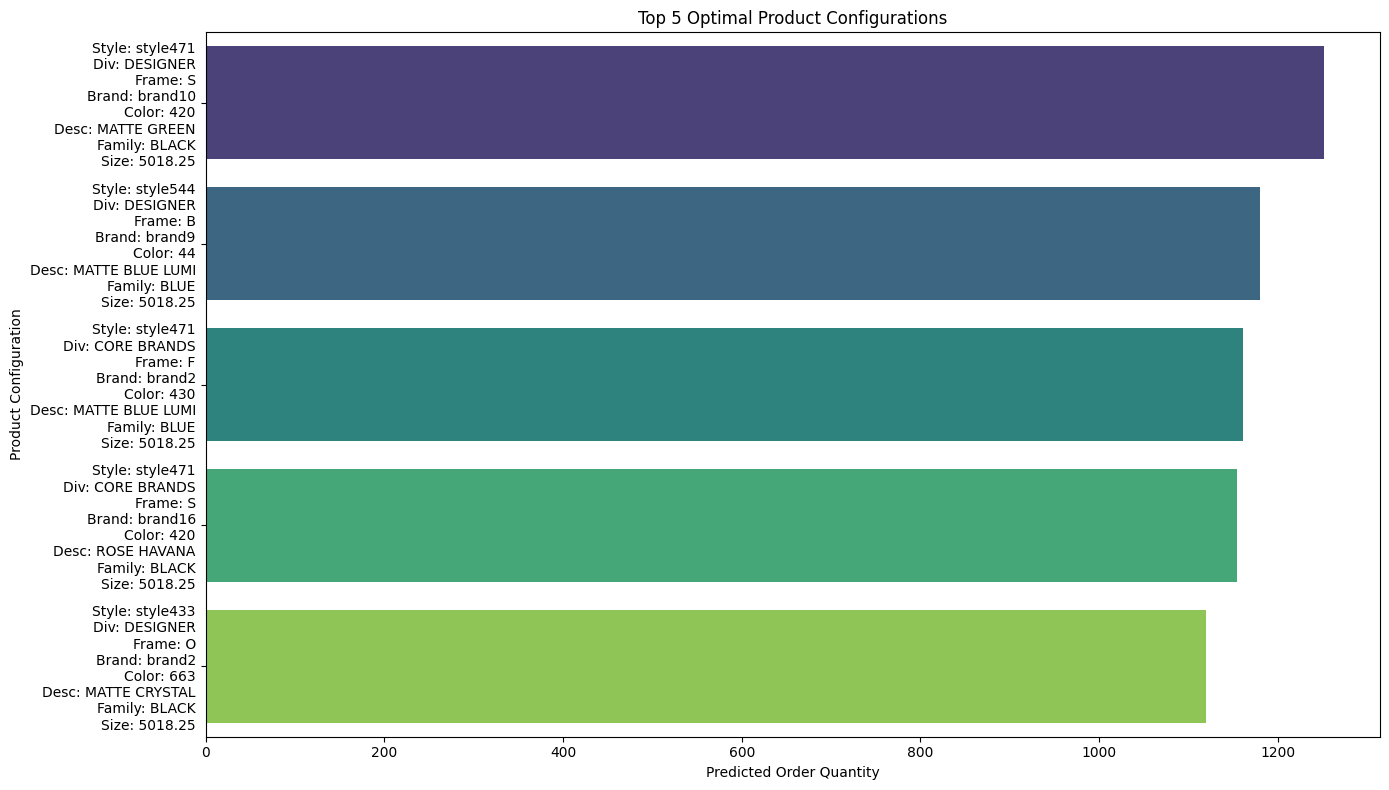

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler

# -------------------------------
# Step 1: Load Data and Basic Checks
# -------------------------------
file_path = "carnegie_mellon_output_summary_final.csv"
df = pd.read_csv(file_path)

print("\nFirst 5 rows:")
print(df.head())

# Convert 'order_qty' to numeric and filter out rows with order_qty <= 100
df.loc[:, 'order_qty'] = pd.to_numeric(df['order_qty'], errors='coerce')
df = df[df['order_qty'] > 100].copy()
print("\nDataset shape after filtering order_qty > 100:", df.shape)

# -------------------------------
# Step 2: Convert Categorical Features to Numeric
# -------------------------------
df = df.copy()  # Explicit copy to avoid warnings

# 1. 'style_name' -> LabelEncoder
style_encoder = LabelEncoder()
df.loc[:, 'style_name_numeric'] = style_encoder.fit_transform(df['style_name'].astype(str))

# 2. 'division_name' -> Manual mapping
division_map = {"DESIGNER": 1, "SPORTS&TECH": 2, "CORE BRANDS": 3}
df.loc[:, 'division_name_numeric'] = df['division_name'].map(division_map)

# 3. 'frame_shape_code' -> Manual mapping
frame_shape_map = {
    "M": 1, "S": 2, "C": 3, "O": 4, "F": 5,
    "B": 6, "H": 7, "R": 8, "G": 9, "L": 10, "E": 11
}
df.loc[:, 'frame_shape_code_numeric'] = df['frame_shape_code'].map(frame_shape_map)

# 4. 'brand_name' -> Remove "brand" prefix and convert the remainder to int
df.loc[:, 'brand_name'] = df['brand_name'].astype(str)
df.loc[:, 'brand_name_numeric'] = df['brand_name'].str.replace("brand", "", regex=False).astype(int)

# 5. 'color' -> LabelEncoder
color_encoder = LabelEncoder()
df.loc[:, 'color_numeric'] = color_encoder.fit_transform(df['color'].astype(str))

# 6. 'color_description' -> LabelEncoder
desc_encoder = LabelEncoder()
df.loc[:, 'color_description_numeric'] = desc_encoder.fit_transform(df['color_description'].astype(str))

# 7. 'color_family' -> LabelEncoder
family_encoder = LabelEncoder()
df.loc[:, 'color_family_numeric'] = family_encoder.fit_transform(df['color_family'].astype(str))

# -------------------------------
# Step 3: Process the Numeric Feature: size
# -------------------------------
df.loc[:, 'size'] = pd.to_numeric(df['size'], errors='coerce')
df = df.dropna(subset=['size']).copy()

scaler = StandardScaler()
df.loc[:, 'size_scaled'] = scaler.fit_transform(df[['size']])

# -------------------------------
# Step 4: Prepare Data and Build the Random Forest Model
# -------------------------------
features = [
    'style_name_numeric',
    'division_name_numeric',
    'frame_shape_code_numeric',
    'brand_name_numeric',
    'color_numeric',
    'color_description_numeric',
    'color_family_numeric',
    'size_scaled'
]
target = 'order_qty'

df_model = df.dropna(subset=features + [target]).copy()

X = df_model[features]
y = df_model[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nTest RMSE:", rmse)

# -------------------------------
# Step 5: Display Feature Importances
# -------------------------------
importances = model.feature_importances_
print("\nFeature Importances:")
for feat, imp in zip(features, importances):
    print(f"  {feat}: {imp:.4f}")

# -------------------------------
# HELPER FUNCTION: Sample Unique Values
# -------------------------------
def sample_unique(values, max_count=20):
    values = list(values)
    if len(values) > max_count:
        return random.sample(values, max_count)
    else:
        return values

# -------------------------------
# Step 6: Prescriptive Optimization (Random Sampling)
# -------------------------------
# Sample unique candidate values for each categorical feature
style_vals = sample_unique(df_model['style_name_numeric'].unique(), max_count=50)
division_vals = sample_unique(df_model['division_name_numeric'].unique(), max_count=5)
frame_vals = sample_unique(df_model['frame_shape_code_numeric'].unique(), max_count=10)
brand_vals = sample_unique(df_model['brand_name_numeric'].unique(), max_count=50)
color_vals = sample_unique(df_model['color_numeric'].unique(), max_count=40)
desc_vals = sample_unique(df_model['color_description_numeric'].unique(), max_count=40)
fam_vals = sample_unique(df_model['color_family_numeric'].unique(), max_count=20)

# For 'size_scaled', choose 5 equally spaced candidate values
size_candidates = np.linspace(df_model['size_scaled'].min(), df_model['size_scaled'].max(), 5)

# Instead of full Cartesian product, sample a fixed number of candidate combinations directly.
n_candidates = 20000  # Adjust as needed
candidate_combinations = []
for i in range(n_candidates):
    candidate = (
        random.choice(style_vals),
        random.choice(division_vals),
        random.choice(frame_vals),
        random.choice(brand_vals),
        random.choice(color_vals),
        random.choice(desc_vals),
        random.choice(fam_vals),
        random.choice(size_candidates)
    )
    candidate_combinations.append(candidate)

cols = [
    'style_name_numeric',
    'division_name_numeric',
    'frame_shape_code_numeric',
    'brand_name_numeric',
    'color_numeric',
    'color_description_numeric',
    'color_family_numeric',
    'size_scaled'
]
candidate_df = pd.DataFrame(candidate_combinations, columns=cols)

predictions = model.predict(candidate_df)
candidate_df['predicted_order_qty'] = predictions

top_candidates = candidate_df.sort_values('predicted_order_qty', ascending=False).head(5)
print("\nTop 5 Configurations (Numeric Codes) for Maximum Predicted Order Qty:")
print(top_candidates)

# -------------------------------
# Step 7: Decode for Interpretability
# -------------------------------
top_candidates.loc[:, 'style_name'] = style_encoder.inverse_transform(top_candidates['style_name_numeric'].astype(int))
division_map_inv = {v: k for k, v in division_map.items()}
top_candidates.loc[:, 'division_name'] = top_candidates['division_name_numeric'].map(division_map_inv)
frame_shape_map_inv = {v: k for k, v in frame_shape_map.items()}
top_candidates.loc[:, 'frame_shape_code'] = top_candidates['frame_shape_code_numeric'].map(frame_shape_map_inv)
top_candidates.loc[:, 'brand_name'] = "brand" + top_candidates['brand_name_numeric'].astype(str)
top_candidates.loc[:, 'color'] = color_encoder.inverse_transform(top_candidates['color_numeric'].astype(int))
top_candidates.loc[:, 'color_description'] = desc_encoder.inverse_transform(top_candidates['color_description_numeric'].astype(int))
top_candidates.loc[:, 'color_family'] = family_encoder.inverse_transform(top_candidates['color_family_numeric'].astype(int))
top_candidates.loc[:, 'size'] = scaler.inverse_transform(top_candidates[['size_scaled']]).flatten()

print("\nTop 5 Configurations with Original Feature Values:")
print(top_candidates[[
    'style_name', 'division_name', 'frame_shape_code', 'brand_name',
    'color', 'color_description', 'color_family', 'size', 'predicted_order_qty'
]])

# -------------------------------
# Step 8: Visualize the Top Configurations (Optional)
# -------------------------------
plt.figure(figsize=(14, 8))
config_labels = top_candidates.apply(
    lambda row: (f"Style: {row['style_name']}\n"
                 f"Div: {row['division_name']}\n"
                 f"Frame: {row['frame_shape_code']}\n"
                 f"Brand: {row['brand_name']}\n"
                 f"Color: {row['color']}\n"
                 f"Desc: {row['color_description']}\n"
                 f"Family: {row['color_family']}\n"
                 f"Size: {row['size']:.2f}"), axis=1
)
sns.barplot(x=top_candidates['predicted_order_qty'], y=config_labels, palette="viridis")
plt.xlabel("Predicted Order Quantity")
plt.ylabel("Product Configuration")
plt.title("Top 5 Optimal Product Configurations")
plt.tight_layout()
plt.show()

##Pricing for the optimal product configurations


In [41]:
# -------------------------------
# Pricing estimation model for eyewear configurations
# -------------------------------

# Define adjustment factors for each attribute based on research insights:
brand_prestige_factor = {
    'low': 0,     # no premium for low-prestige (baseline)
    'medium': 60, # medium prestige adds about $60 (e.g., Warby Parker vs generic)
    'high': 160   # high prestige adds about $160 (luxury premium)
}

material_factor = {
    'basic': -10,   # basic injected plastic: slightly lower cost (subtract $10)
    'standard': 0,  # standard material (acetate/metal baseline): no change
    'premium': 50   # premium material (titanium, etc.): add $50
}

style_popularity_factor = {
    'low': -10,   # niche/low popularity style: -$10 to entice buyers
    'medium': 0,  # average popularity: no change
    'high': 10    # very popular/trendy style: +$10 premium
}

def estimate_price(brand_prestige: str, material: str, style_popularity: str):
    """
    Estimate an optimal price (in USD) for an eyewear product given:
    - brand_prestige: 'low', 'medium', or 'high'
    - material: 'basic', 'standard', or 'premium'
    - style_popularity: 'low', 'medium', or 'high'
    Returns a tuple of (optimal_price, recommended_price_range).
    """
    # Base price for a baseline scenario: medium brand, standard material, medium popularity.
    base_price = 40.0  # starting baseline in dollars (approx for mid-tier acetate frame)

    # Lookup adjustments
    brand_adj = brand_prestige_factor.get(brand_prestige, 0)
    material_adj = material_factor.get(material, 0)
    style_adj = style_popularity_factor.get(style_popularity, 0)

    # Calculate estimated optimal price
    estimated_price = base_price + brand_adj + material_adj + style_adj

    # Determine a small range around the price for flexibility (±5% of price)
    low_end = estimated_price * 0.95
    high_end = estimated_price * 1.05
    # Round to nearest whole dollar for a clean price suggestion
    optimal_price = round(estimated_price)
    price_range = (round(low_end), round(high_end))

    return optimal_price, price_range

# -------------------------------
# Mapping function to infer brand prestige from division numeric code
# -------------------------------
def map_division_to_prestige(division_numeric):
    """
    Map the division numeric code to brand prestige:
    - 1 (DESIGNER): high prestige
    - 2 (SPORTS&TECH): medium prestige
    - 3 (CORE BRANDS): low prestige
    """
    if division_numeric == 1:
        return 'high'
    elif division_numeric == 2:
        return 'medium'
    elif division_numeric == 3:
        return 'low'
    else:
        return 'medium'  # default if undefined

# -------------------------------
# Integrate Pricing Estimation with the Dataset
# -------------------------------
# Assume 'top_candidates' is the DataFrame containing the top 5 configurations (after decoding)
# For the new VSP+ Safinia series, set material to "premium" and assume high style popularity

material_choice = 'premium'
style_popularity_choice = 'high'

# Create lists to store pricing estimates for each configuration
estimated_prices = []
price_ranges = []

# Iterate over each candidate configuration in the top_candidates DataFrame
for idx, row in top_candidates.iterrows():
    # Use the division numeric code (mapped from division_name) to determine brand prestige
    brand_prestige_choice = map_division_to_prestige(row['division_name_numeric'])
    # Estimate the optimal price and price range using the pricing model
    price, pr_range = estimate_price(brand_prestige_choice, material_choice, style_popularity_choice)
    estimated_prices.append(price)
    price_ranges.append(pr_range)

# Add the pricing estimates to the DataFrame
top_candidates['estimated_price'] = estimated_prices
top_candidates['estimated_price_range'] = price_ranges

print("\nTop 5 Configurations with Estimated Prices:")
print(top_candidates[['style_name', 'division_name', 'frame_shape_code', 'brand_name',
                       'color', 'color_description', 'color_family', 'size',
                       'predicted_order_qty', 'estimated_price', 'estimated_price_range']])



Top 5 Configurations with Estimated Prices:
      style_name division_name frame_shape_code brand_name color  \
13208   style471      DESIGNER                S    brand10   420   
5784    style544      DESIGNER                B     brand9    44   
9819    style471   CORE BRANDS                F     brand2   430   
10011   style471   CORE BRANDS                S    brand16   420   
11458   style433      DESIGNER                O     brand2   663   

      color_description color_family     size  predicted_order_qty  \
13208       MATTE GREEN        BLACK  5018.25          1251.691071   
5784    MATTE BLUE LUMI         BLUE  5018.25          1180.039500   
9819    MATTE BLUE LUMI         BLUE  5018.25          1160.631095   
10011       ROSE HAVANA        BLACK  5018.25          1153.709595   
11458     MATTE CRYSTAL        BLACK  5018.25          1120.021095   

       estimated_price estimated_price_range  
13208              260            (247, 273)  
5784               260         

<ipython-input-42-6c7b666b6929>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='predicted_order_qty', y='config_label', data=top_candidates, palette='viridis')


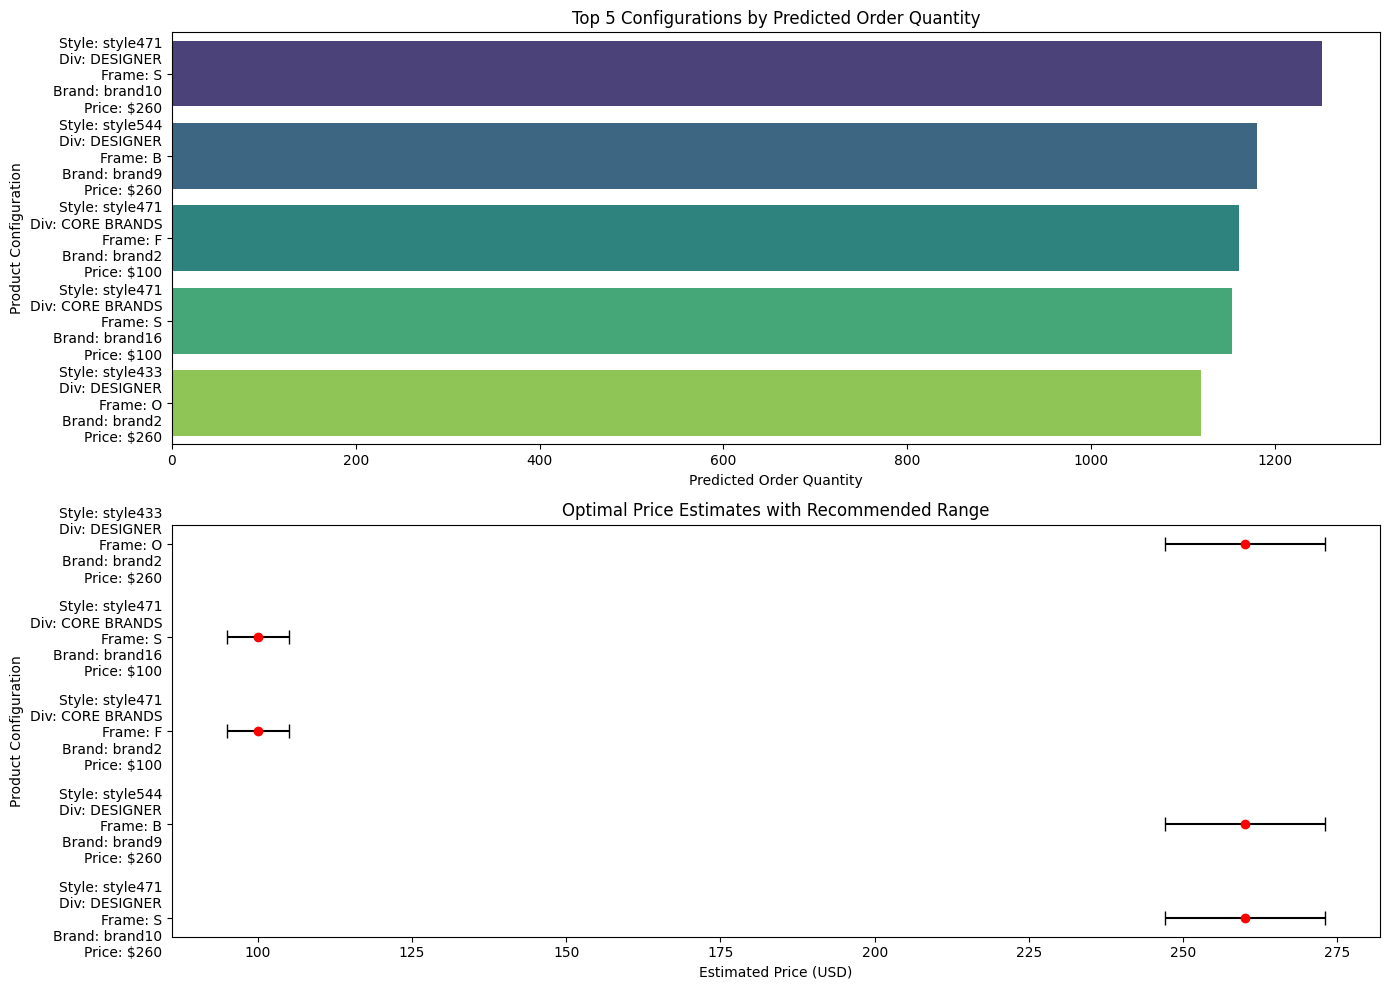

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a configuration label to display key features along with the estimated price
top_candidates['config_label'] = top_candidates.apply(
    lambda row: (f"Style: {row['style_name']}\n"
                 f"Div: {row['division_name']}\n"
                 f"Frame: {row['frame_shape_code']}\n"
                 f"Brand: {row['brand_name']}\n"
                 f"Price: ${row['estimated_price']}"), axis=1)

plt.figure(figsize=(14, 10))

# -------------------------------
# Subplot 1: Predicted Order Quantity
# -------------------------------
plt.subplot(2, 1, 1)
sns.barplot(x='predicted_order_qty', y='config_label', data=top_candidates, palette='viridis')
plt.xlabel("Predicted Order Quantity")
plt.ylabel("Product Configuration")
plt.title("Top 5 Configurations by Predicted Order Quantity")

# -------------------------------
# Subplot 2: Estimated Price with Recommended Range
# -------------------------------
plt.subplot(2, 1, 2)
# Calculate error bars: difference between estimated price and the lower/upper recommended price
error_lower = top_candidates['estimated_price'] - top_candidates['estimated_price_range'].apply(lambda x: x[0])
error_upper = top_candidates['estimated_price_range'].apply(lambda x: x[1]) - top_candidates['estimated_price']

plt.errorbar(top_candidates['estimated_price'], top_candidates['config_label'],
             xerr=[error_lower, error_upper], fmt='o', color='red', ecolor='black', capsize=5)
plt.xlabel("Estimated Price (USD)")
plt.ylabel("Product Configuration")
plt.title("Optimal Price Estimates with Recommended Range")

plt.tight_layout()
plt.show()
